In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, max_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [2]:
df_option = pd.read_pickle("final_target_features.pkl")

In [3]:
def is_third_friday(date_ts):
    return date_ts.weekday() == 4 and 15 <= date_ts.day <= 21

In [ ]:
df_option.columns

In [4]:
df_option['OP_EXP'] = [is_third_friday(df_option.index[i]) for i in range(len(df_option.index))]

In [5]:
sign = lambda x : True if x >0 else False

In [6]:
df_option['diff_cut_close'].values[0]

-0.020000000000038654

In [7]:
df_option["Up_down"] = [sign(df_option['diff_cut_close'].values[i]) for i in range(len(df_option))]

In [8]:
df_option

after_volume  target_std  cut_off_price  1st_open_price  \
Date_Only                                                             
2024-01-05  33647.684047    0.647952         351.97          346.99   
2024-01-12  14637.650523    0.623070         375.35          370.16   
2024-01-19  30805.581046    0.491669         383.87          379.00   
2024-01-26  22934.530121    0.797657         395.75          393.85   
2024-02-02  58477.049646    2.300481         479.47          459.69   
...                  ...         ...            ...             ...   
2025-02-28  28897.762393    2.193834         657.21          658.39   
2025-03-07  19665.738949    1.290368         626.71          625.74   
2025-03-14  21608.461949    0.717556         605.67          603.00   
2025-03-21  42290.536186    0.680493         593.51          583.29   
2025-03-28  23326.652933    1.187063         578.00          600.31   

            1hr_prior_price  2hr_prior_price  3hr_prior_price  close_price  \
Date_Only                                                                    
2024-01-05           351.19           350.92           352.00       351.95   
2024-01-12           374.64           373.78           376.28       374.49   
2024-01-19           383.14           381.14           381.32       383.52   
2024-01-26           395.86           396.02           396.27       394.14   
2024-02-02           476.81           481.79           477.02       474.88   
...                     ...              ...              ...          ...   
2025-02-28           658.33           660.72           658.91       668.53   
2025-03-07           615.67           606.18           607.29       625.34   
2025-03-14           604.83           605.13           603.48       607.35   
2025-03-21           592.50           592.68           589.97       596.24   
2025-03-28           581.73           582.41           586.11       576.76   

             prior_volume  prior_std  ...        Vix      Nas_open  \
Date_Only                             ...                            
2024-01-05   17696.394029   0.991232  ...  13.350000  14500.110352   
2024-01-12   26026.915082   0.938764  ...  12.700000  15001.009766   
2024-01-19   52199.124509   1.061027  ...  13.300000  15122.379883   
2024-01-26   16632.938901   1.189034  ...  13.260000  15474.849609   
2024-02-02  173337.414347   4.432709  ...  13.850000  15403.160156   
...                   ...        ...  ...        ...           ...   
2025-02-28   25648.103499   3.258261  ...  19.629999  18477.169922   
2025-03-07   22301.877563   8.661127  ...  23.370001  18029.849609   
2025-03-14   20142.479920   2.831638  ...  21.770000  17523.300781   
2025-03-21   95587.281620   3.071509  ...  19.280001  17519.839844   
2025-03-28   20837.145436   5.173113  ...  21.650000  17722.089844   

              Nas_diff  diff_1_Open  diff_2_Open  diff_3_Open  Nas_volume  \
Date_Only                                                                   
2024-01-05   23.959961     2.478293     2.000513    -4.309736  5232820000   
2024-01-12  -28.250000    -1.960733     9.943156    13.695472  4958940000   
2024-01-19  188.589844     7.474786    12.640437     5.324905  5604950000   
2024-01-26  -19.489258     4.160372     4.329594     9.684374  4510530000   
2024-02-02  225.790039    65.352005    70.268841    55.747290  4800690000   
...                ...          ...          ...          ...         ...   
2025-02-28  370.109375   -24.388334    -1.608621    -7.922955  8247520000   
2025-03-07  166.371094   -22.609893   -15.616154   -20.122103  8135420000   
2025-03-14  230.789062   -16.898667   -26.540125     8.278916  7093850000   
2025-03-21  264.210938     0.659973    -0.860046   -16.630005  8837930000   
2025-03-28 -399.099609    -1.690002   -24.580017   -26.450012  7015410000   

                 date OP_EXP  Up_down  
Date_Only                              
2024-01-05 2024-01-05  False    False  
2024-01-12 2024-01-12  False    False  


In [ ]:
sns.pairplot(df_option[['target_std','Vix','OP_EXP','prior_std']], hue='target_std')

---
---

<Axes: >

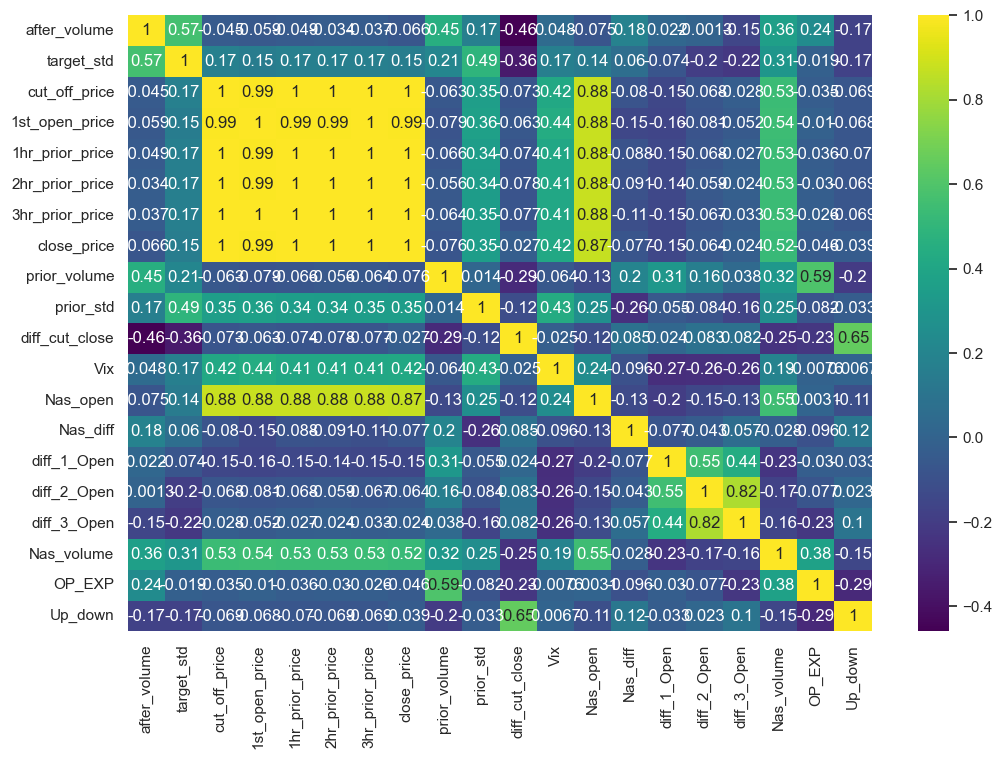

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(df_option.corr(numeric_only=True),cmap='viridis',annot=True)

<Axes: ylabel='Frequency'>

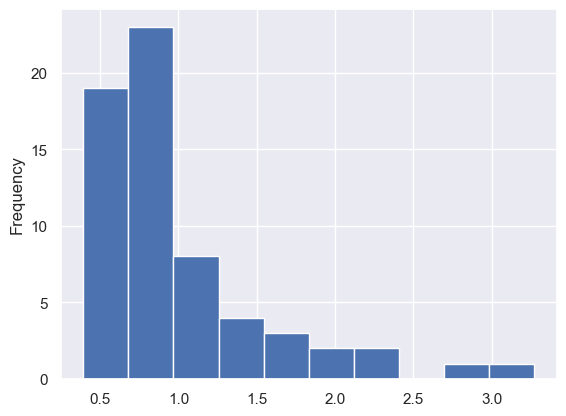

In [10]:
df_option.target_std.plot.hist()

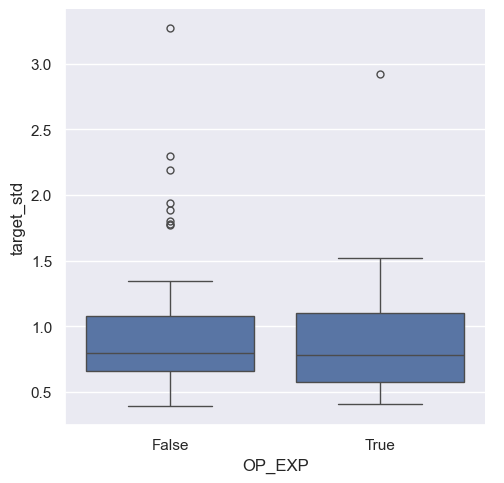

In [11]:
sns.catplot(x='OP_EXP',y='target_std',data=df_option, kind='box')

In [12]:
df_option.reset_index(inplace=True)

## Splitting the Data


In [91]:
X = df_option.drop(['Date_Only','target_std','date','after_volume','Up_down','diff_cut_close','close_price','Nas_diff'], axis=1)  
y = df_option['target_std']

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [156]:
X_train.shape

(50, 14)

In [157]:
y_train.shape

(50,)

## Evaluation Run Model with the Data


In [158]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    
    mae = mean_absolute_error(y_test,preds)
    print(f'mae : {mae}')
   
    
    plt.figure(figsize=(12,8),dpi=200)
    plt.scatter(y_test, preds)
    plt.xlabel('real_std')

    return model

In [146]:
scaler = MinMaxScaler()

In [97]:
scaler.fit(X_train)

MinMaxScaler()

In [98]:
#sc_X = scaler.transform(X)

In [99]:
#sc_X_train, sc_X_test, y_train, y_test = train_test_split(sc_X, y, test_size=0.2, random_state=10)

In [159]:
# Define the parameter grid for GridSearchCV
dt_regressor = DecisionTreeRegressor()

# param_grid = {
#     'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],  # Or other relevant criteria
#     'max_depth': [1, 2, 3, 4, 5],  # Or other relevant depths
#     #'max_features': ['auto', 'sqrt', 'log2'],  # Or other relevant features
#     'splitter': ['best', 'random'],  # Or other relevant splitters
#     # Add other parameters as needed
# }

param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
}

In [160]:
grid_search = GridSearchCV(
    estimator=dt_regressor,  # The model to tune
    param_grid=param_grid,  # The parameter grid
    scoring='neg_root_mean_squared_error',  # Or other relevant scoring metric
    cv=10,  # Number of cross-validation folds
    verbose=2,  # Show progress
    n_jobs=-1  # Use all available cores
)

In [161]:
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [162]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

Best parameters: {'criterion': 'absolute_error', 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}


mae : 0.32058334043565906


DecisionTreeRegressor(criterion='absolute_error', max_depth=3,
                      min_samples_leaf=5)

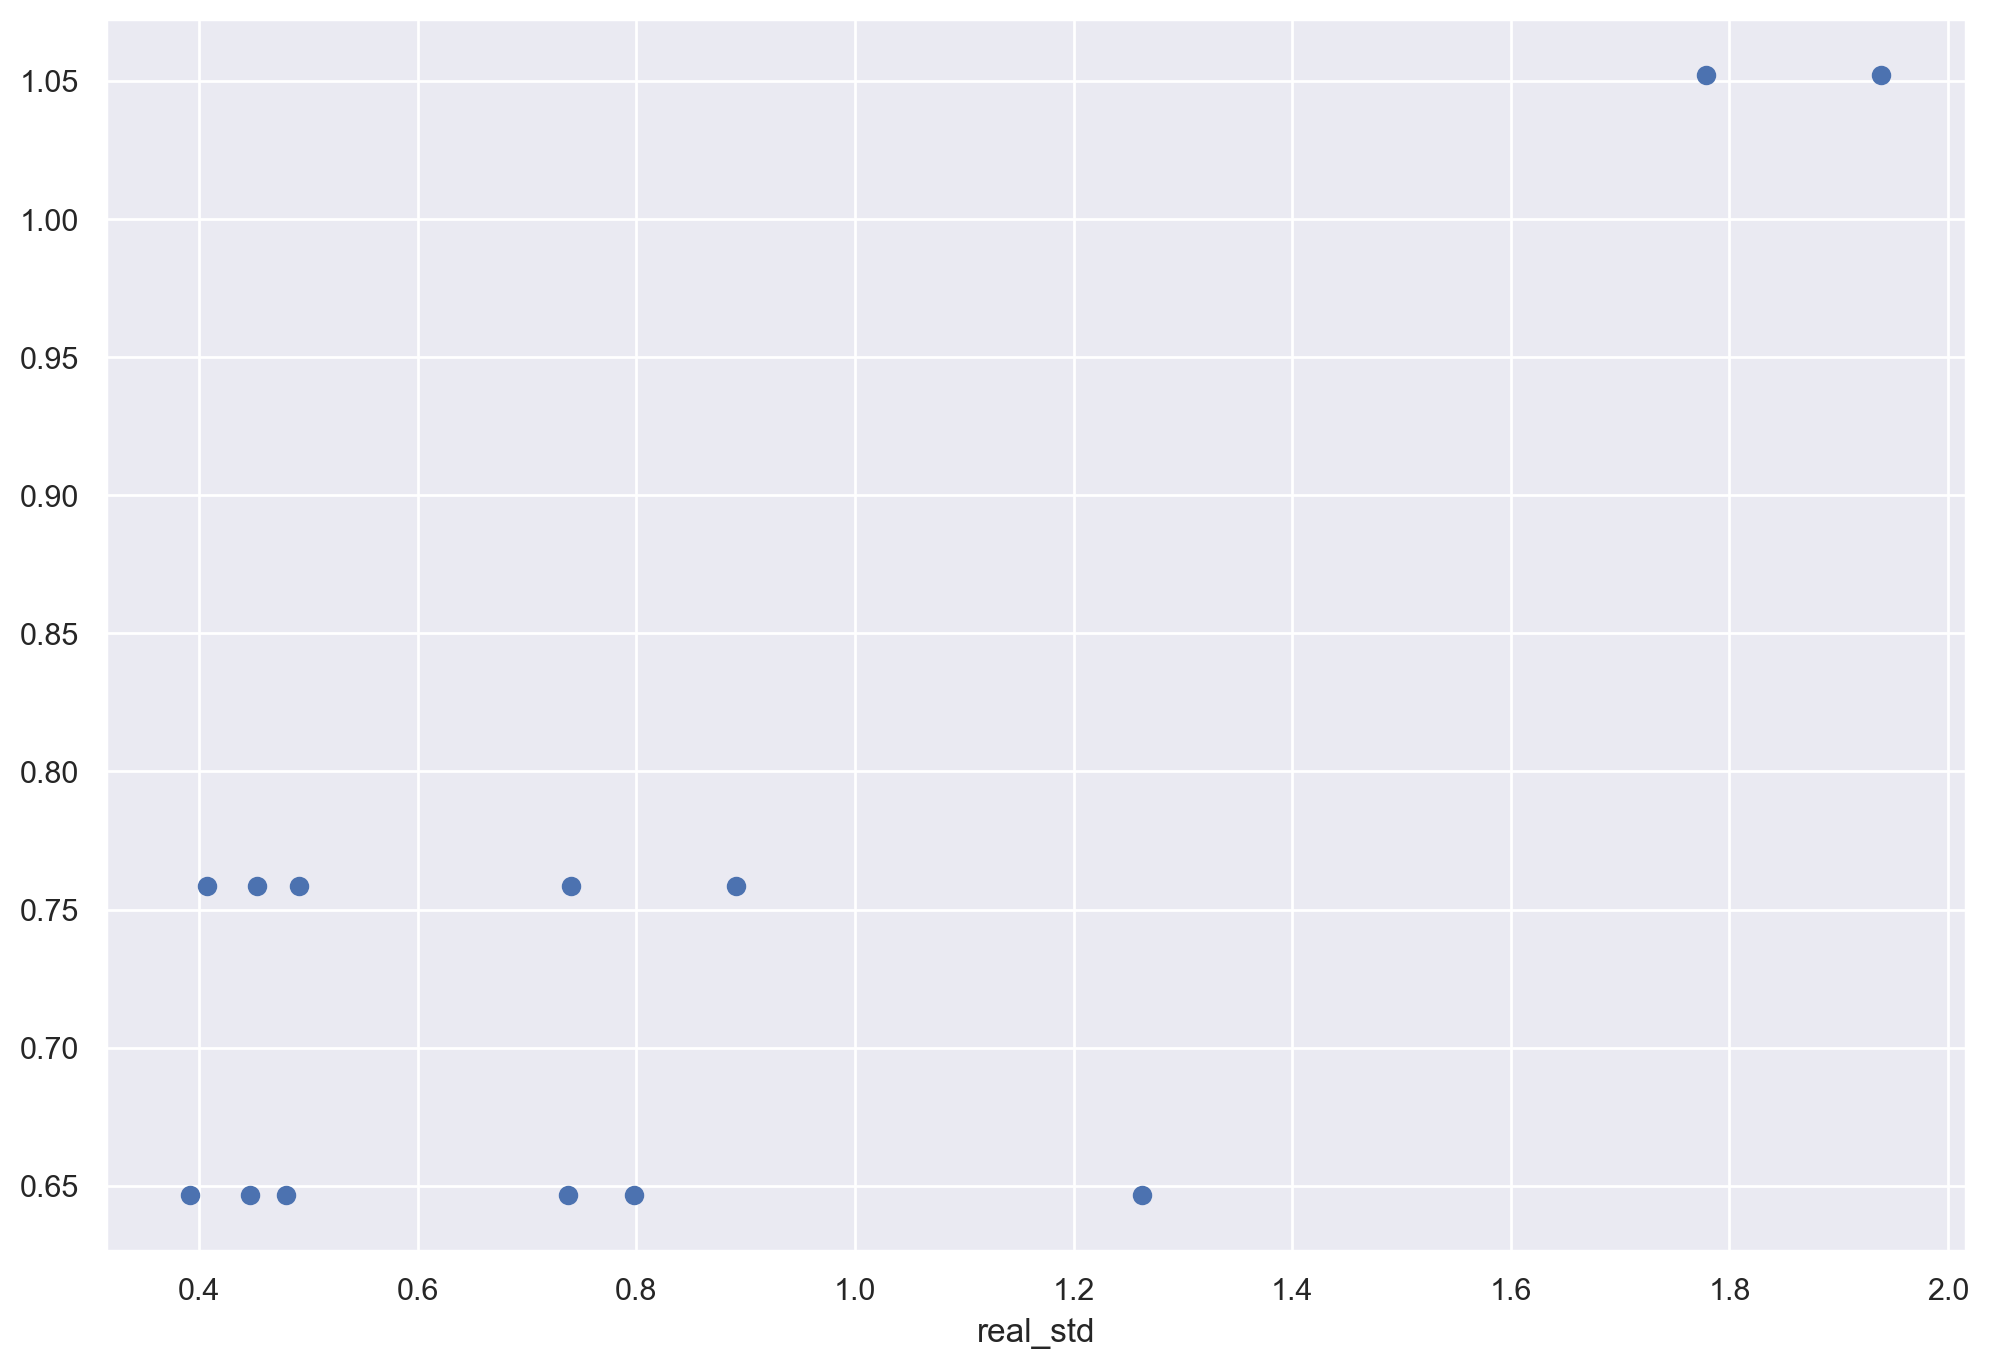

In [163]:
run_model(best_model,X_train, y_train, X_test, y_test)

In [164]:
### Default Decison Tree model

In [165]:
dt_regressor_default = DecisionTreeRegressor()

mae : 0.3872433039618865


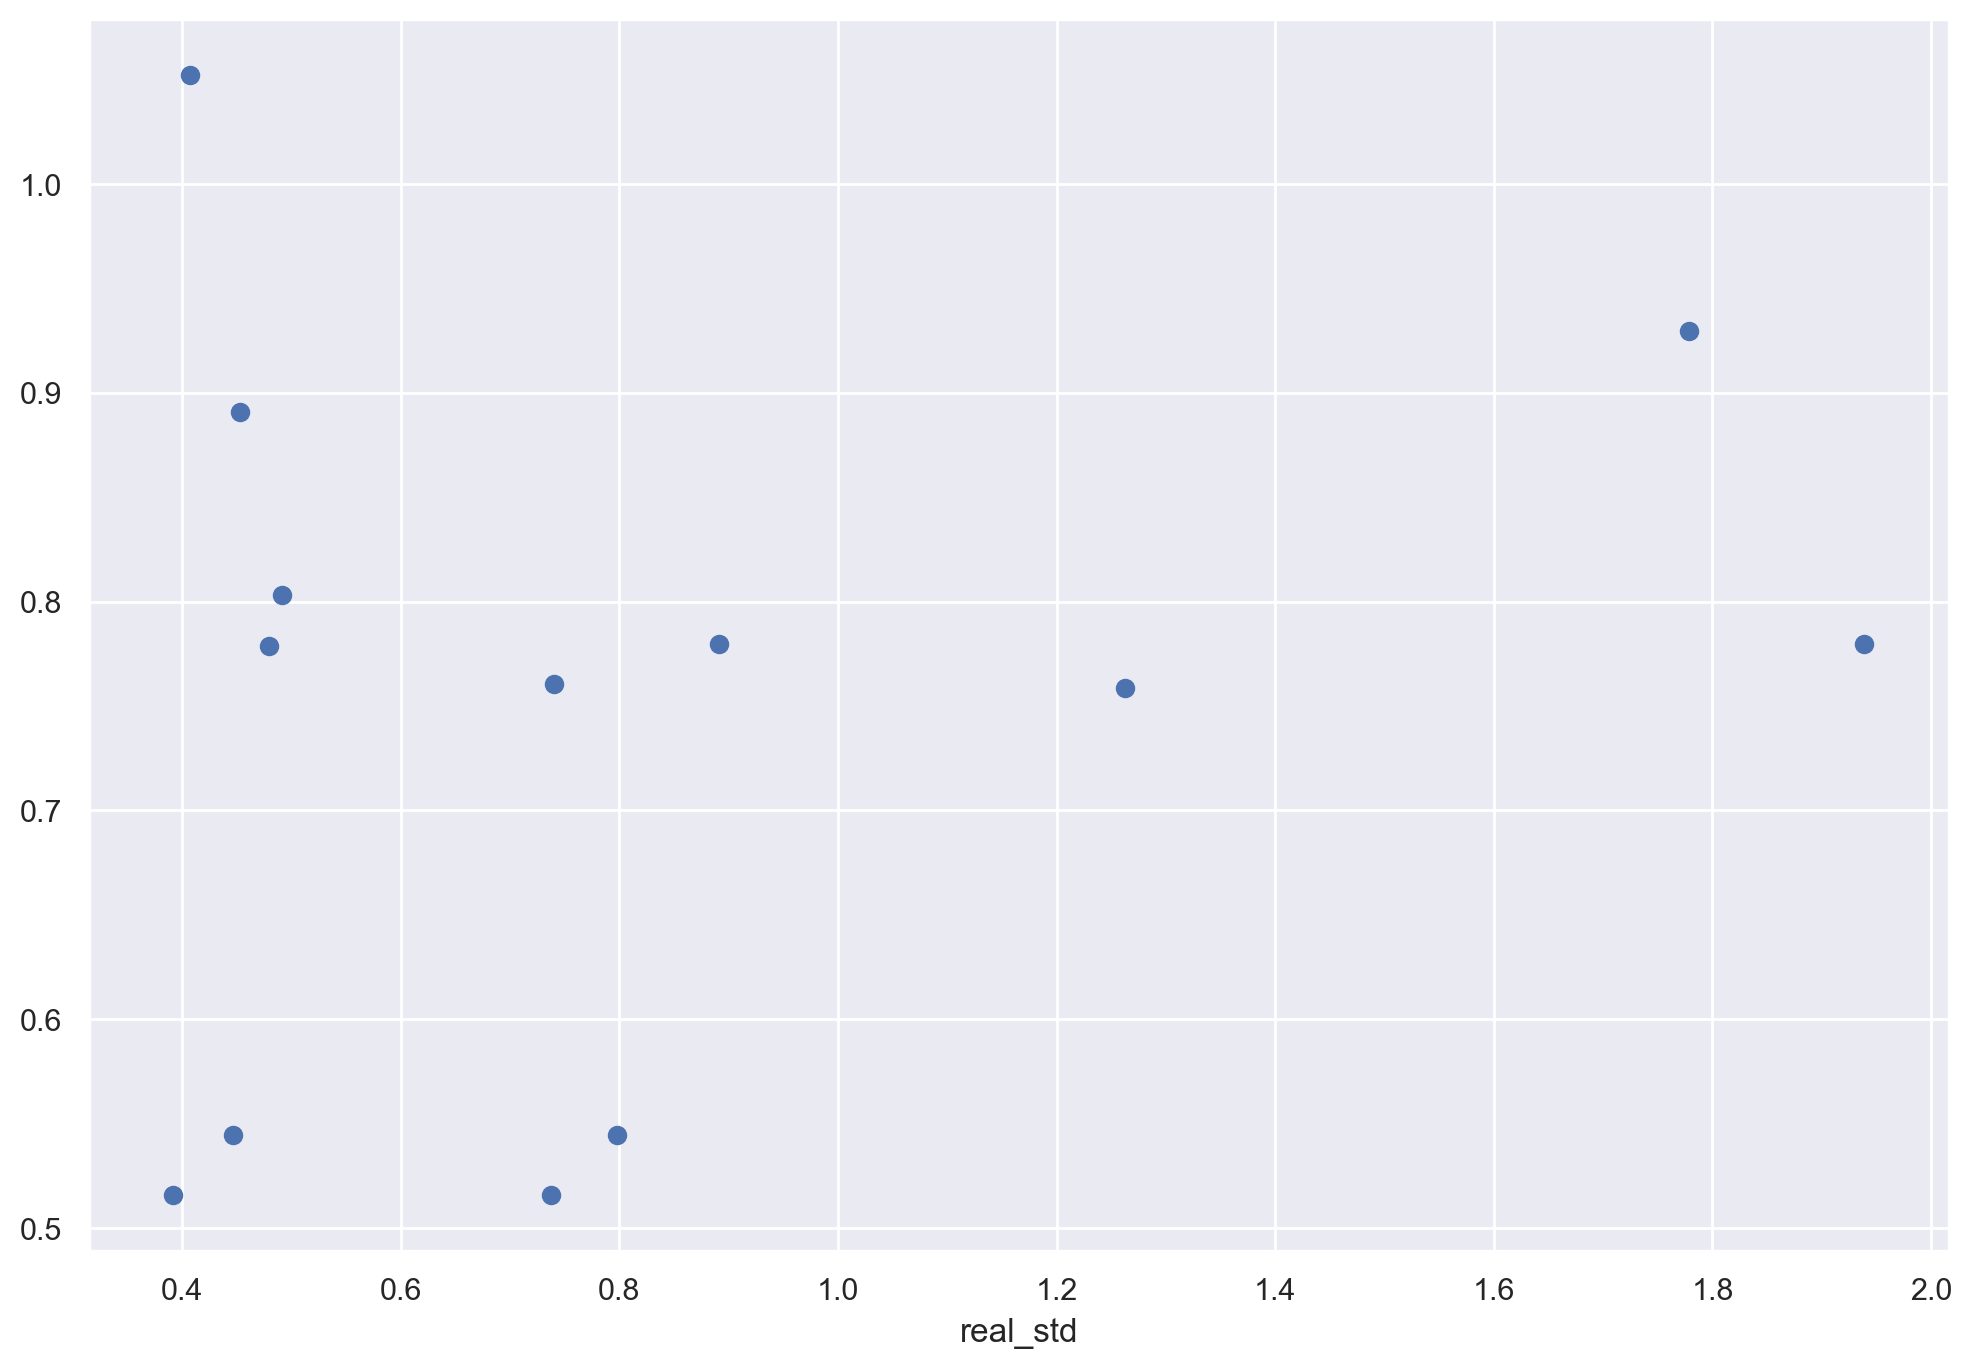

In [166]:
dt_model = run_model(dt_regressor_default,X_train, y_train, X_test, y_test)

In [167]:
## RF Grid Search

In [195]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on test set:", mse)

Best parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Best score: -0.3436725478810744
Mean Squared Error on test set: 0.2259062039544687


In [196]:
pd.DataFrame(index=X.columns,data=best_model.feature_importances_,columns=['Feature Importance'])

Feature Importance
cut_off_price              0.010123
1st_open_price             0.010762
1hr_prior_price            0.057537
2hr_prior_price            0.000000
3hr_prior_price            0.017875
prior_volume               0.071142
prior_std                  0.355887
Vix                        0.071431
Nas_open                   0.036393
diff_1_Open                0.100582
diff_2_Open                0.051172
diff_3_Open                0.064425
Nas_volume                 0.152672
OP_EXP                     0.000000

In [198]:
import joblib
# Assuming 'model' is your trained model object
filename = 'rf_model.joblib'
joblib.dump(model, filename)

# To load the model later:
#loaded_model = joblib.load(filename)

['rf_model.joblib']

mae : 0.3851459453245446


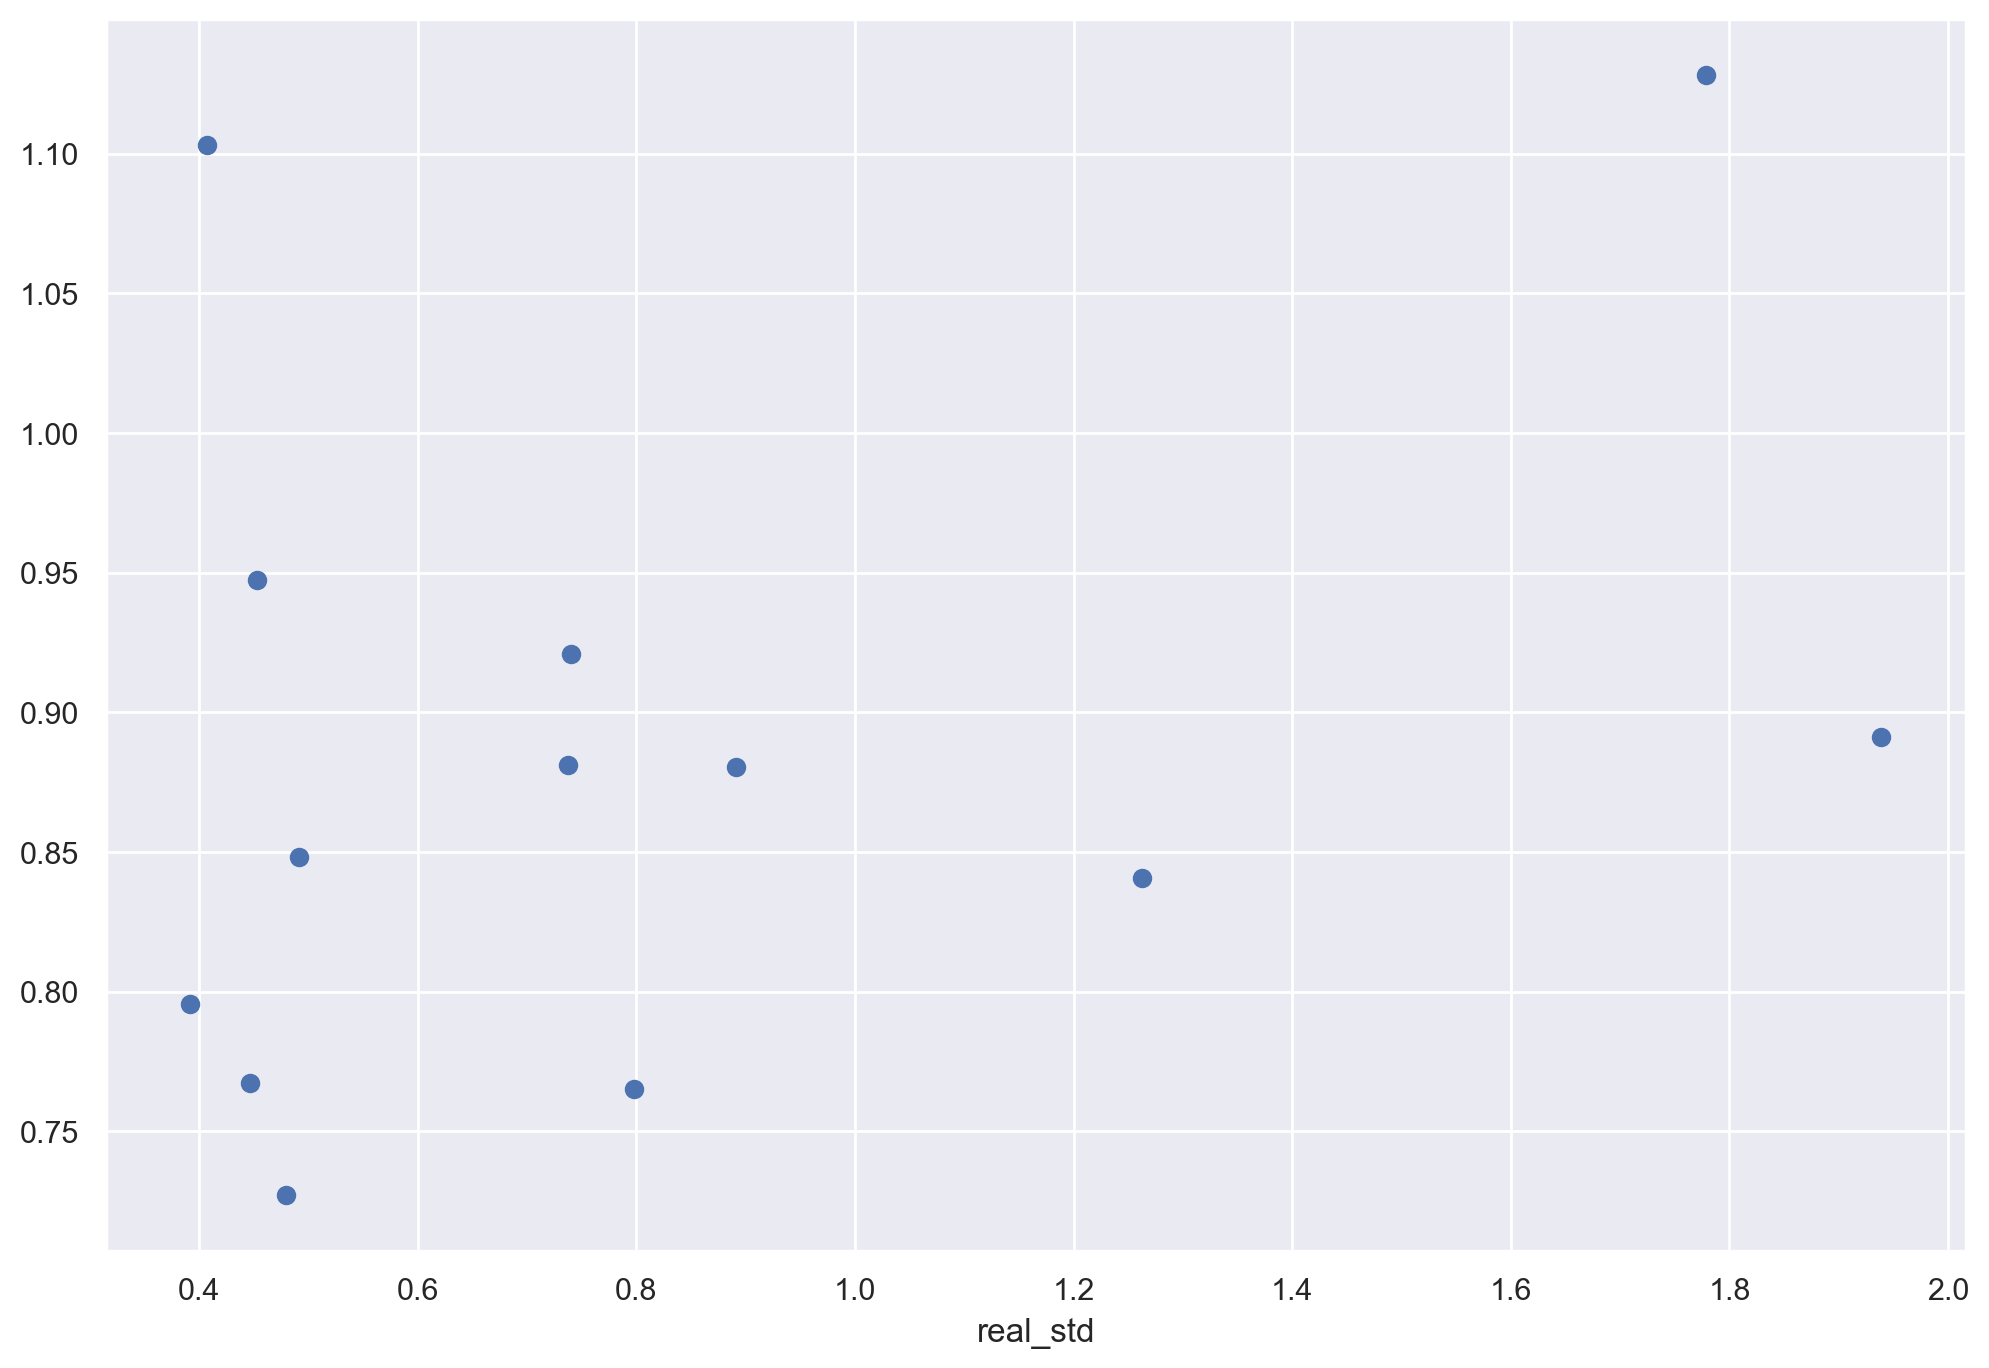

In [197]:
run_model(best_model,X_train, y_train, X_test, y_test)

In [171]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
}

# Instantiate Decision Tree Regressor
tree = DecisionTreeRegressor(random_state=10)

# Instantiate Grid Search
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit Grid Search
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Get the best model
best_tree = grid_search.best_estimator_

# Evaluate the best model on the test set (optional)
test_score = best_tree.score(X_test, y_test)
print("Test score:", test_score)

Best parameters: {'criterion': 'absolute_error', 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best score: -0.3404749675256177
Test score: 0.3312385252121257


In [172]:
best_tree.feature_importances_

array([0.        , 0.        , 0.        , 0.07339936, 0.        ,
       0.        , 0.56691825, 0.        , 0.        , 0.        ,
       0.        , 0.25888574, 0.10079666, 0.        ])

In [173]:
pd.DataFrame(index=X.columns,data=best_tree.feature_importances_,columns=['Feature Importance'])

Feature Importance
cut_off_price              0.000000
1st_open_price             0.000000
1hr_prior_price            0.000000
2hr_prior_price            0.073399
3hr_prior_price            0.000000
prior_volume               0.000000
prior_std                  0.566918
Vix                        0.000000
Nas_open                   0.000000
diff_1_Open                0.000000
diff_2_Open                0.000000
diff_3_Open                0.258886
Nas_volume                 0.100797
OP_EXP                     0.000000

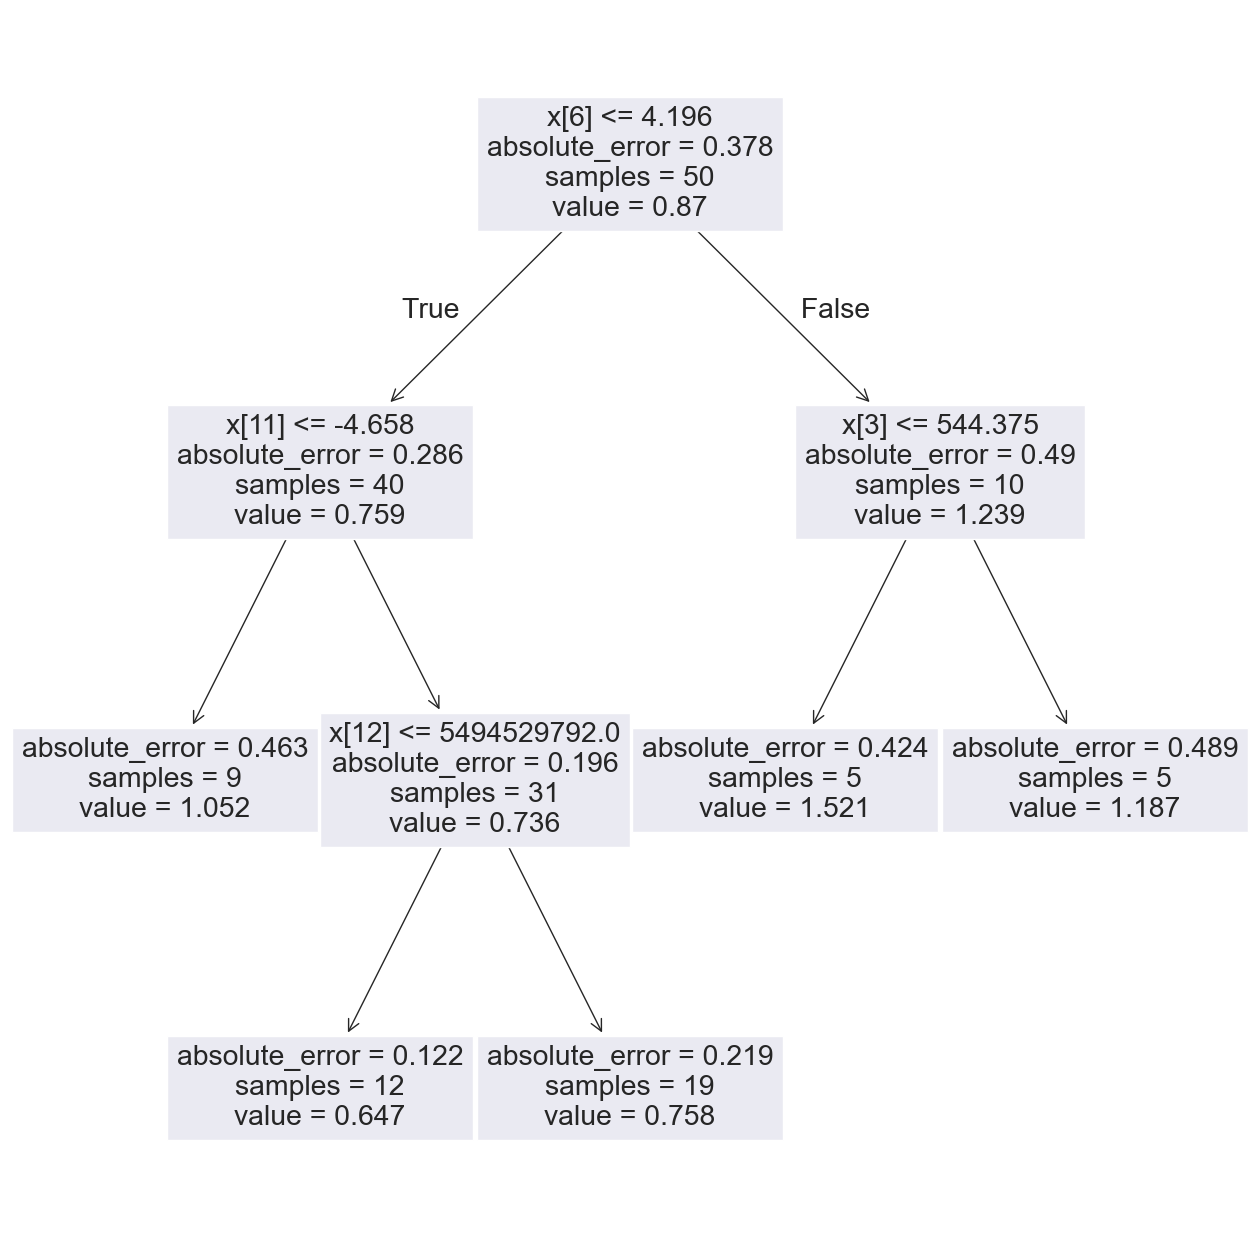

In [174]:
from sklearn.tree import plot_tree
plt.figure(figsize=(16,16))
plot_tree(best_tree);

In [175]:
predic = best_tree.predict(X_test)

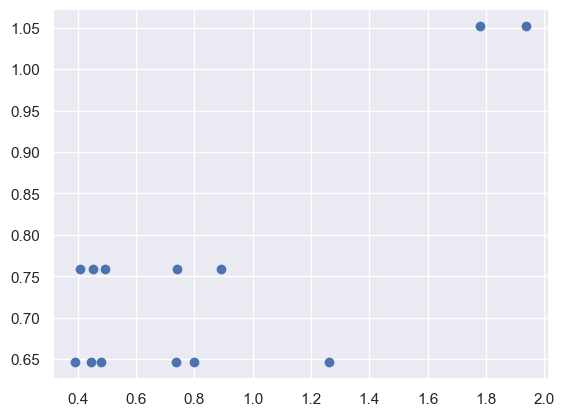

In [176]:
plt.scatter(y_test, predic)

-----

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr_model = LinearRegression()

In [ ]:
lr_model.fit(sc_X_train,y_train)

In [ ]:
lr_preds = lr_model.predict(sc_X_test)

In [ ]:
mean_absolute_error(y_test,lr_preds)

In [ ]:
plt.figure(figsize=(12,8),dpi=200)
#sns.scatterplot(x='Signal',y='Density',data=df,color='black')
plt.scatter(y_test,lr_preds)
plt.xlabel('real_std')

----

## KNN Regression

In [177]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    
    mae = mean_absolute_error(y_test,preds)
    print(f'mae : {mae}')
   
    
    plt.figure(figsize=(12,8),dpi=200)
    plt.scatter(y_test, preds)
    plt.xlabel('real_std')

In [178]:
from sklearn.neighbors import KNeighborsRegressor

mae : 0.5687650975272012
mae : 0.511810661810203
mae : 0.4918426211314758
mae : 0.5232845828410397


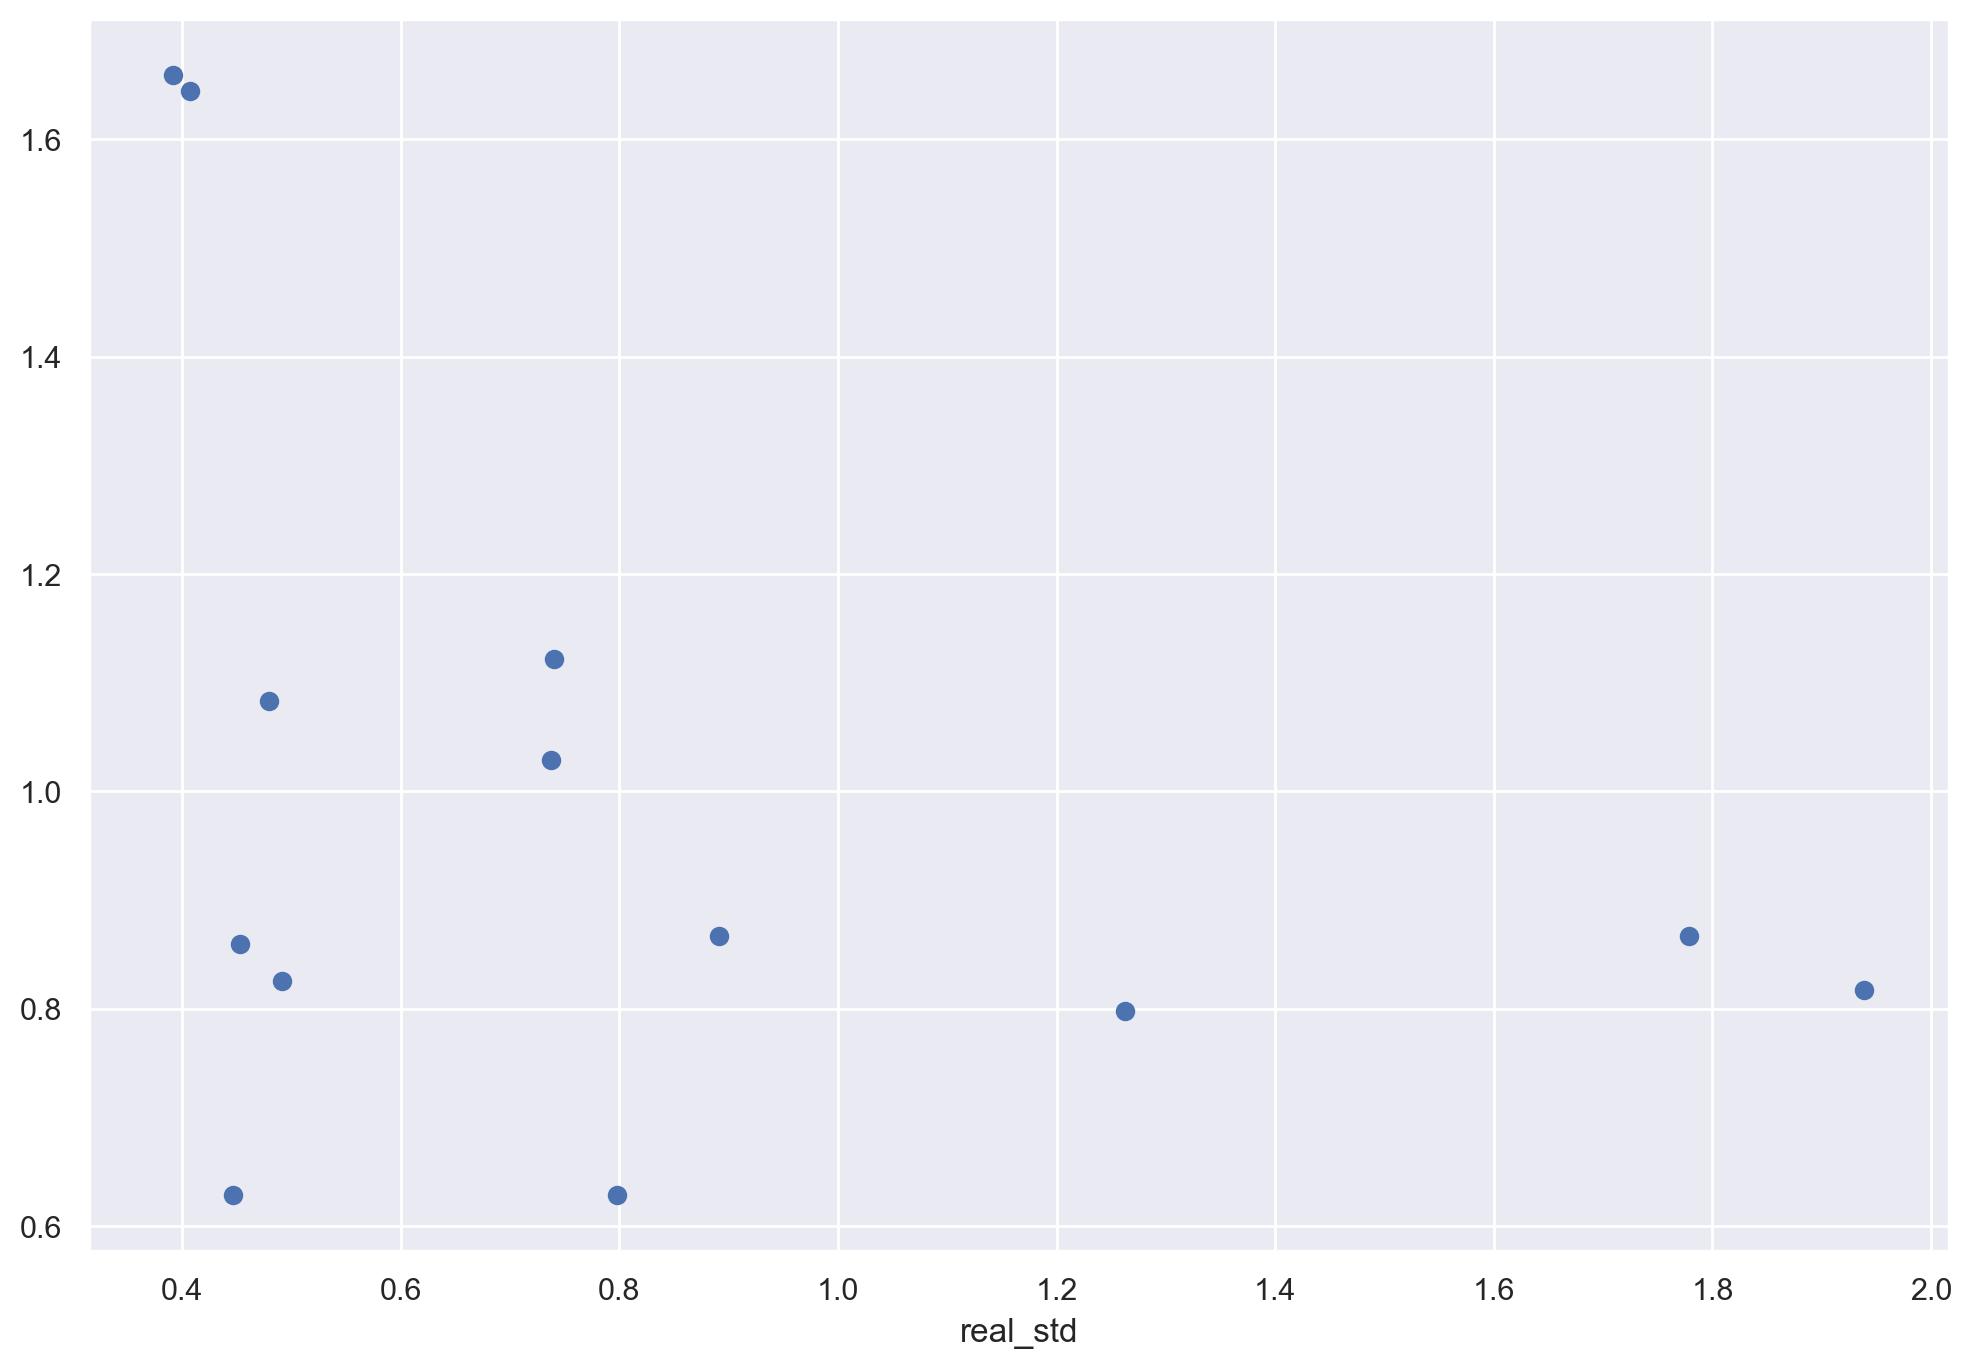

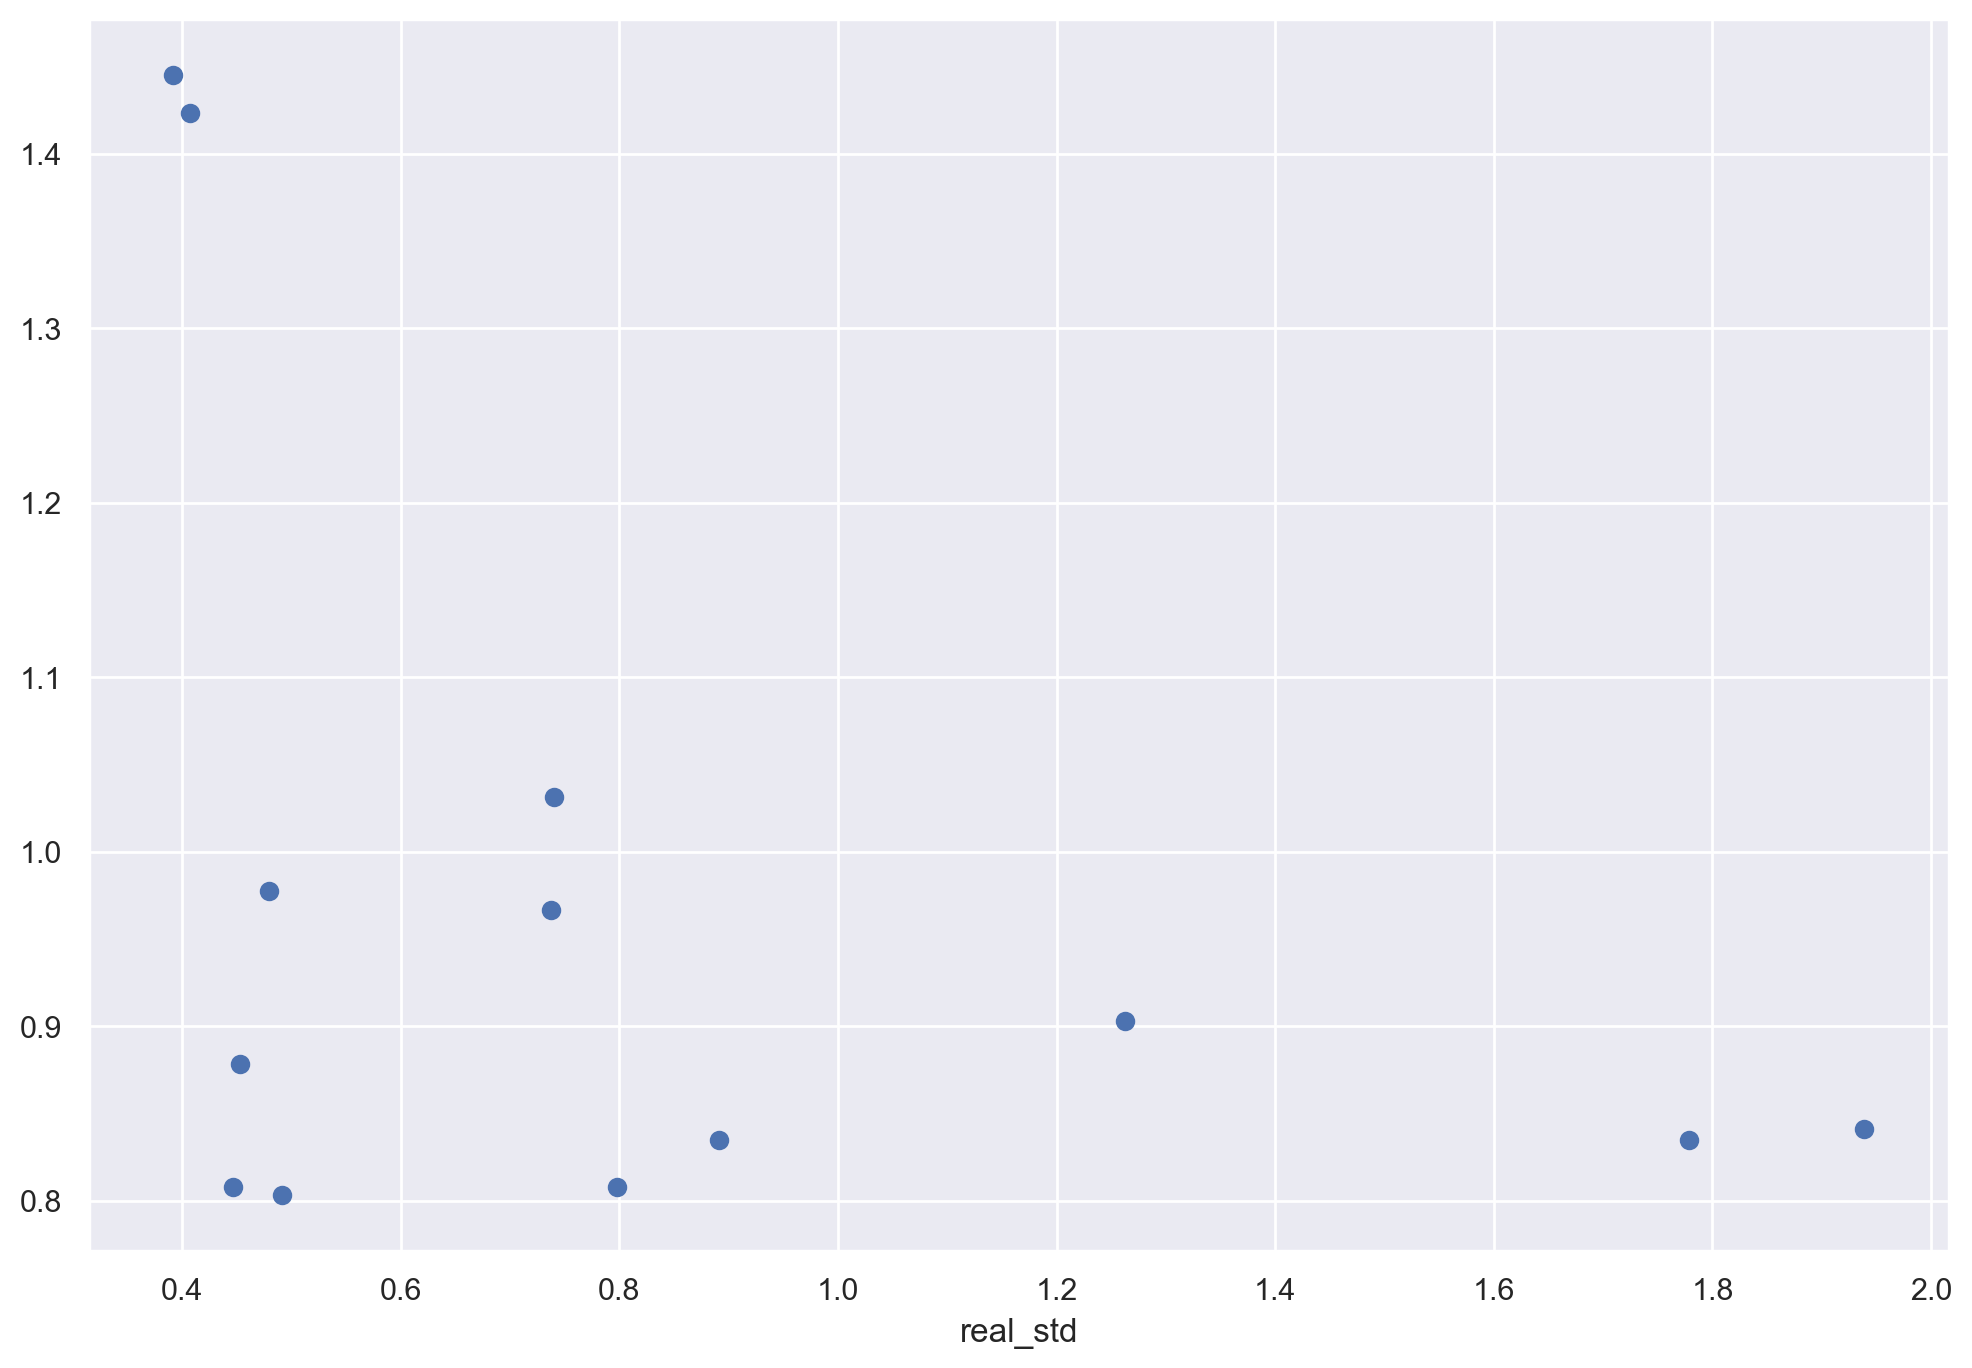

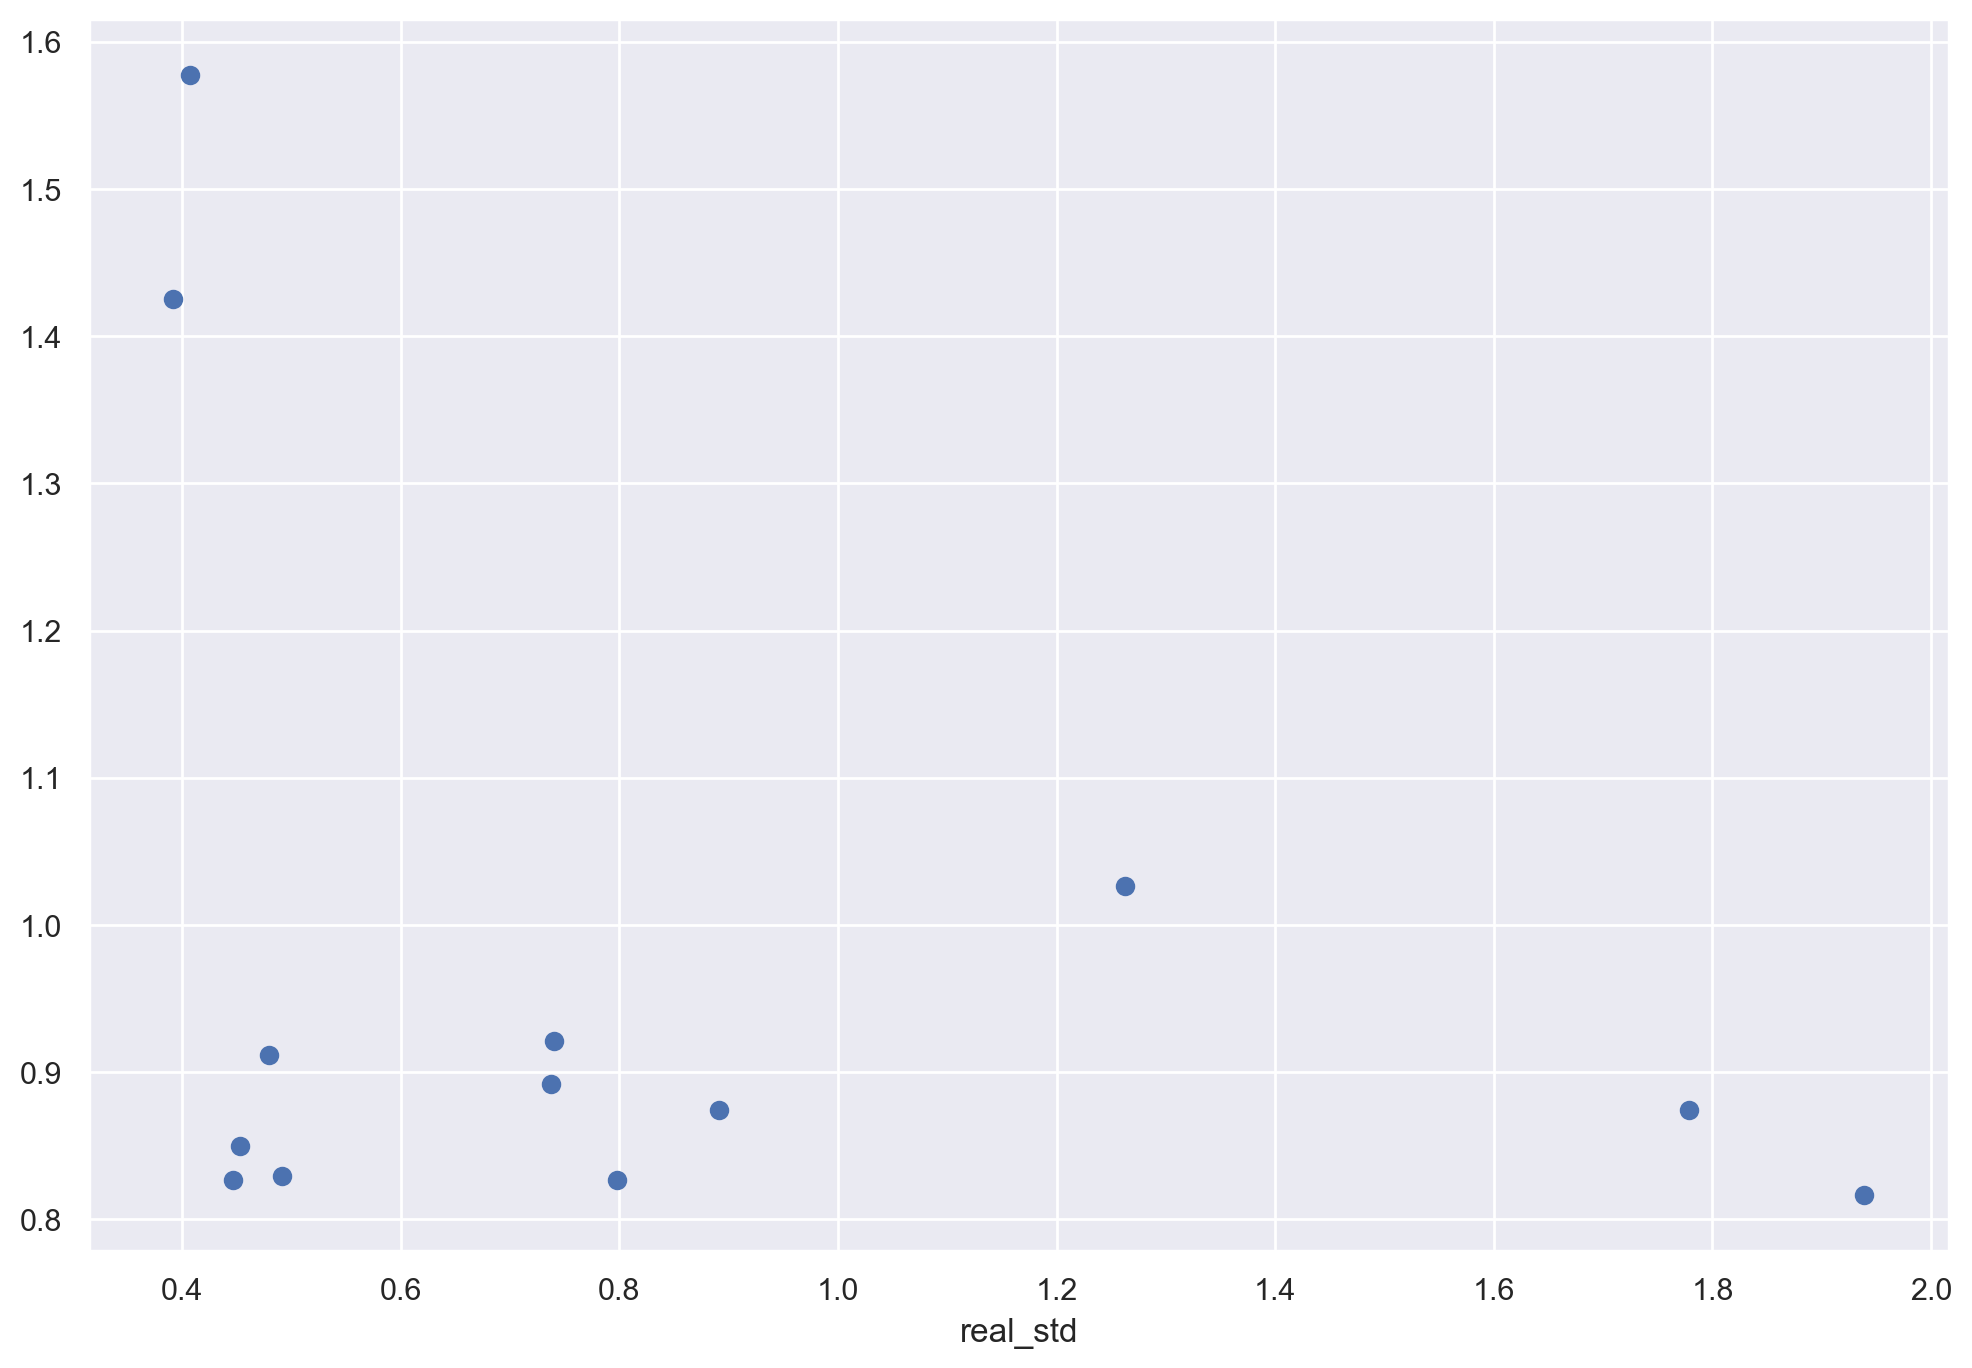

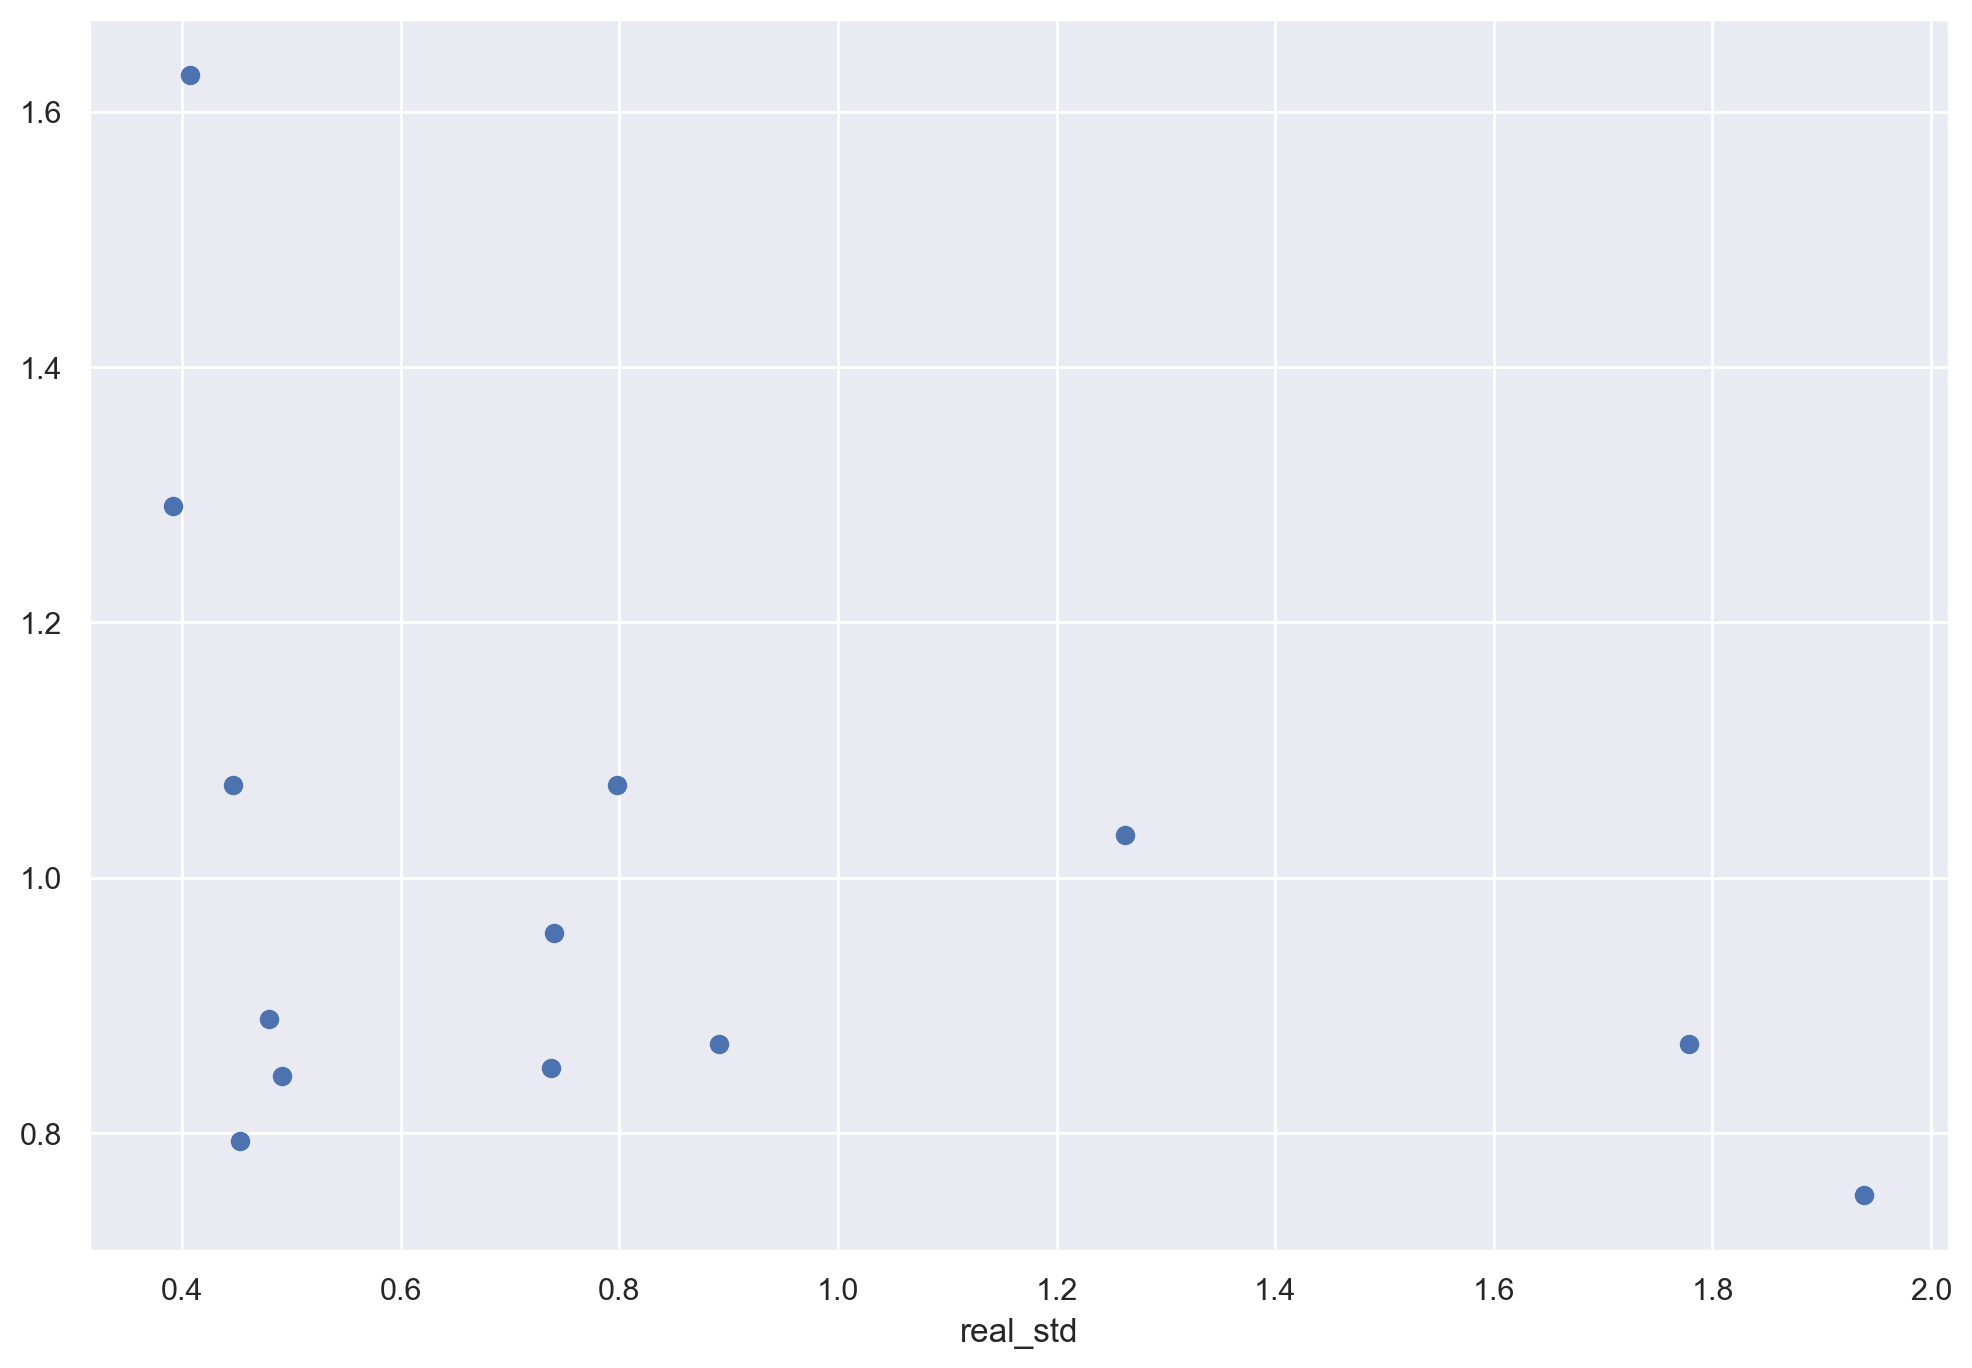

In [179]:
preds = {}
k_values = [3,4,5,6]
for n in k_values:
    
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model,X_train,y_train,X_test,y_test)

In [ ]:
model = KNeighborsRegressor(n_neighbors=5)
run_model(model,X_train,y_train,X_test,y_test)

---
## Decision Tree Regression

In [126]:
from sklearn.tree import DecisionTreeRegressor

mae : 0.621260799496035


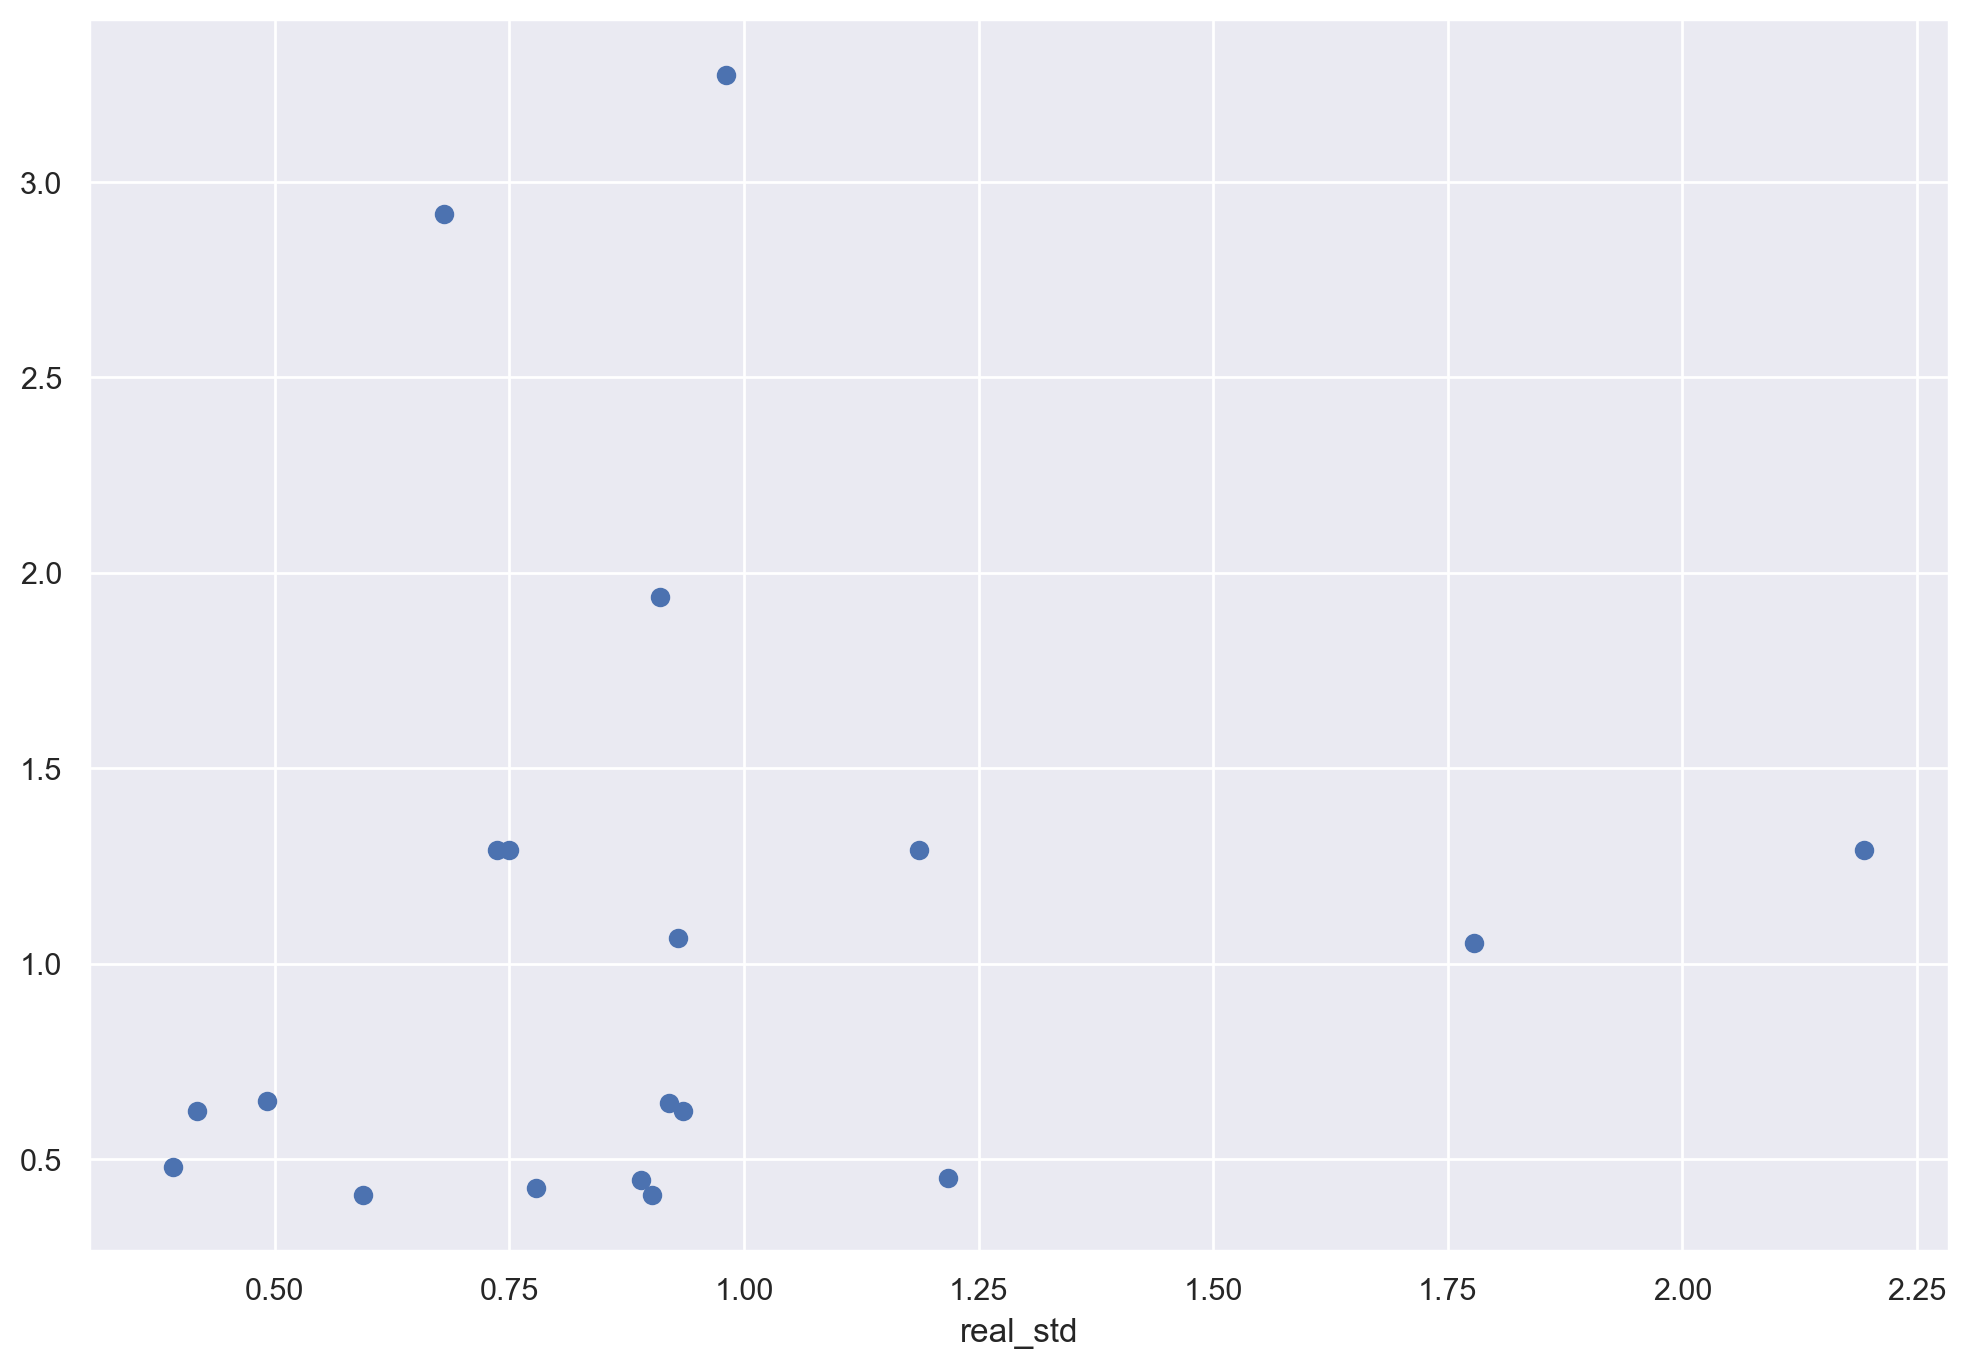

In [127]:
model = DecisionTreeRegressor()

run_model(model,X_train,y_train,X_test,y_test)

In [128]:
model.get_n_leaves()

44

----

## Support Vector Regression

In [ ]:
from sklearn.svm import SVR

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'C':[0.01,0.1,1,5,10,100,1000],'gamma':['auto','scale']}
svr = SVR()

In [ ]:
grid = GridSearchCV(svr,param_grid)

In [ ]:
run_model(grid,X_train,y_train,X_test,y_test)

In [ ]:
grid.best_estimator_

---

## Random Forest Regression

In [180]:
from sklearn.ensemble import RandomForestRegressor

In [181]:
# help(RandomForestRegressor)

mae : 0.4312568293930132
mae : 0.3796369440912442
mae : 0.3584657664294744


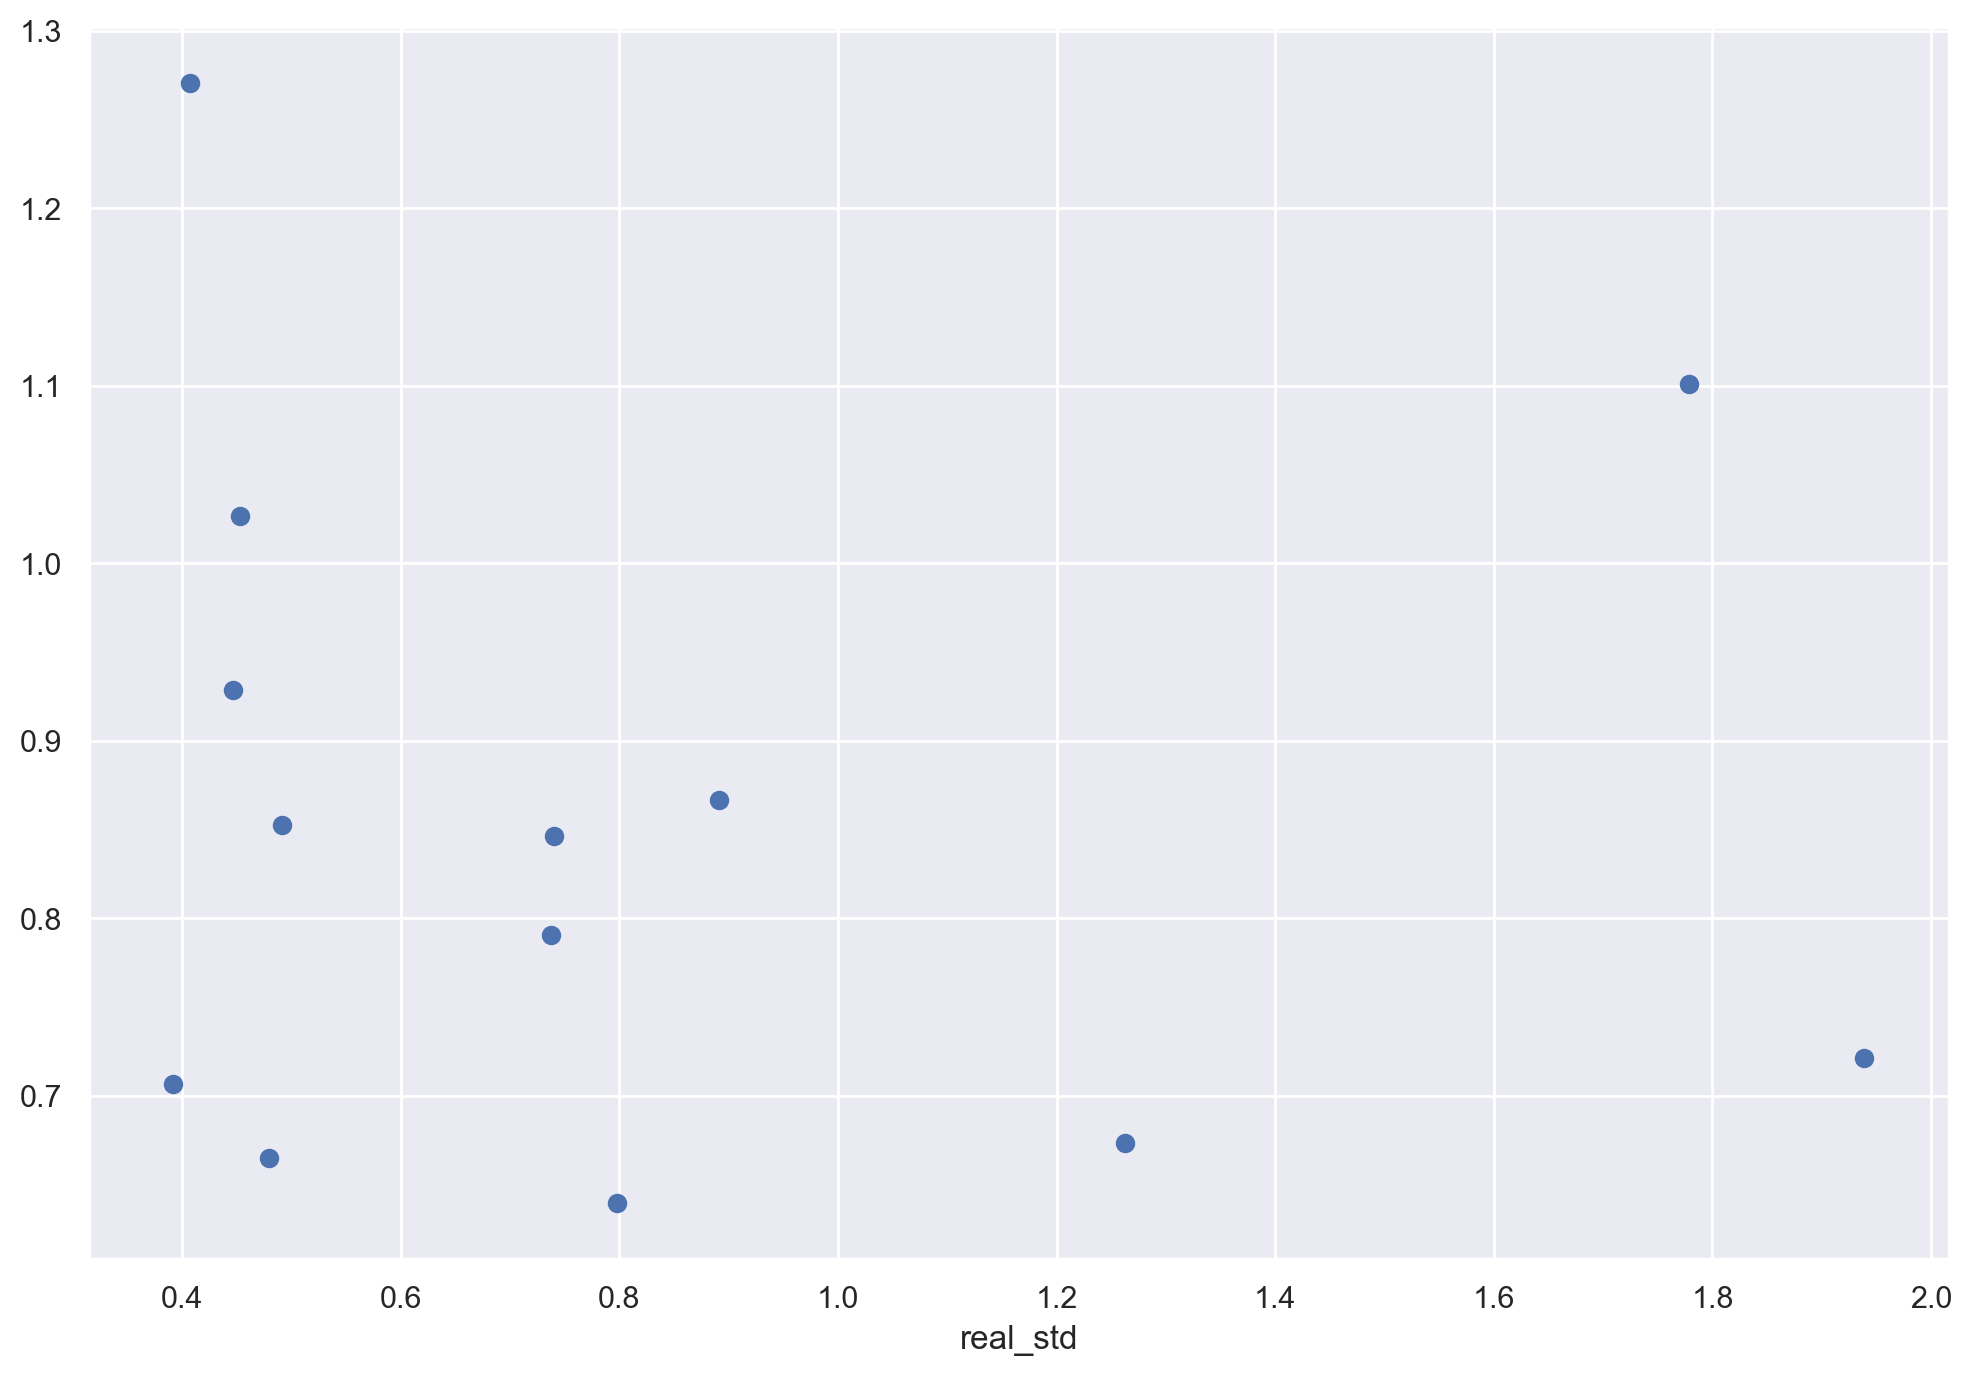

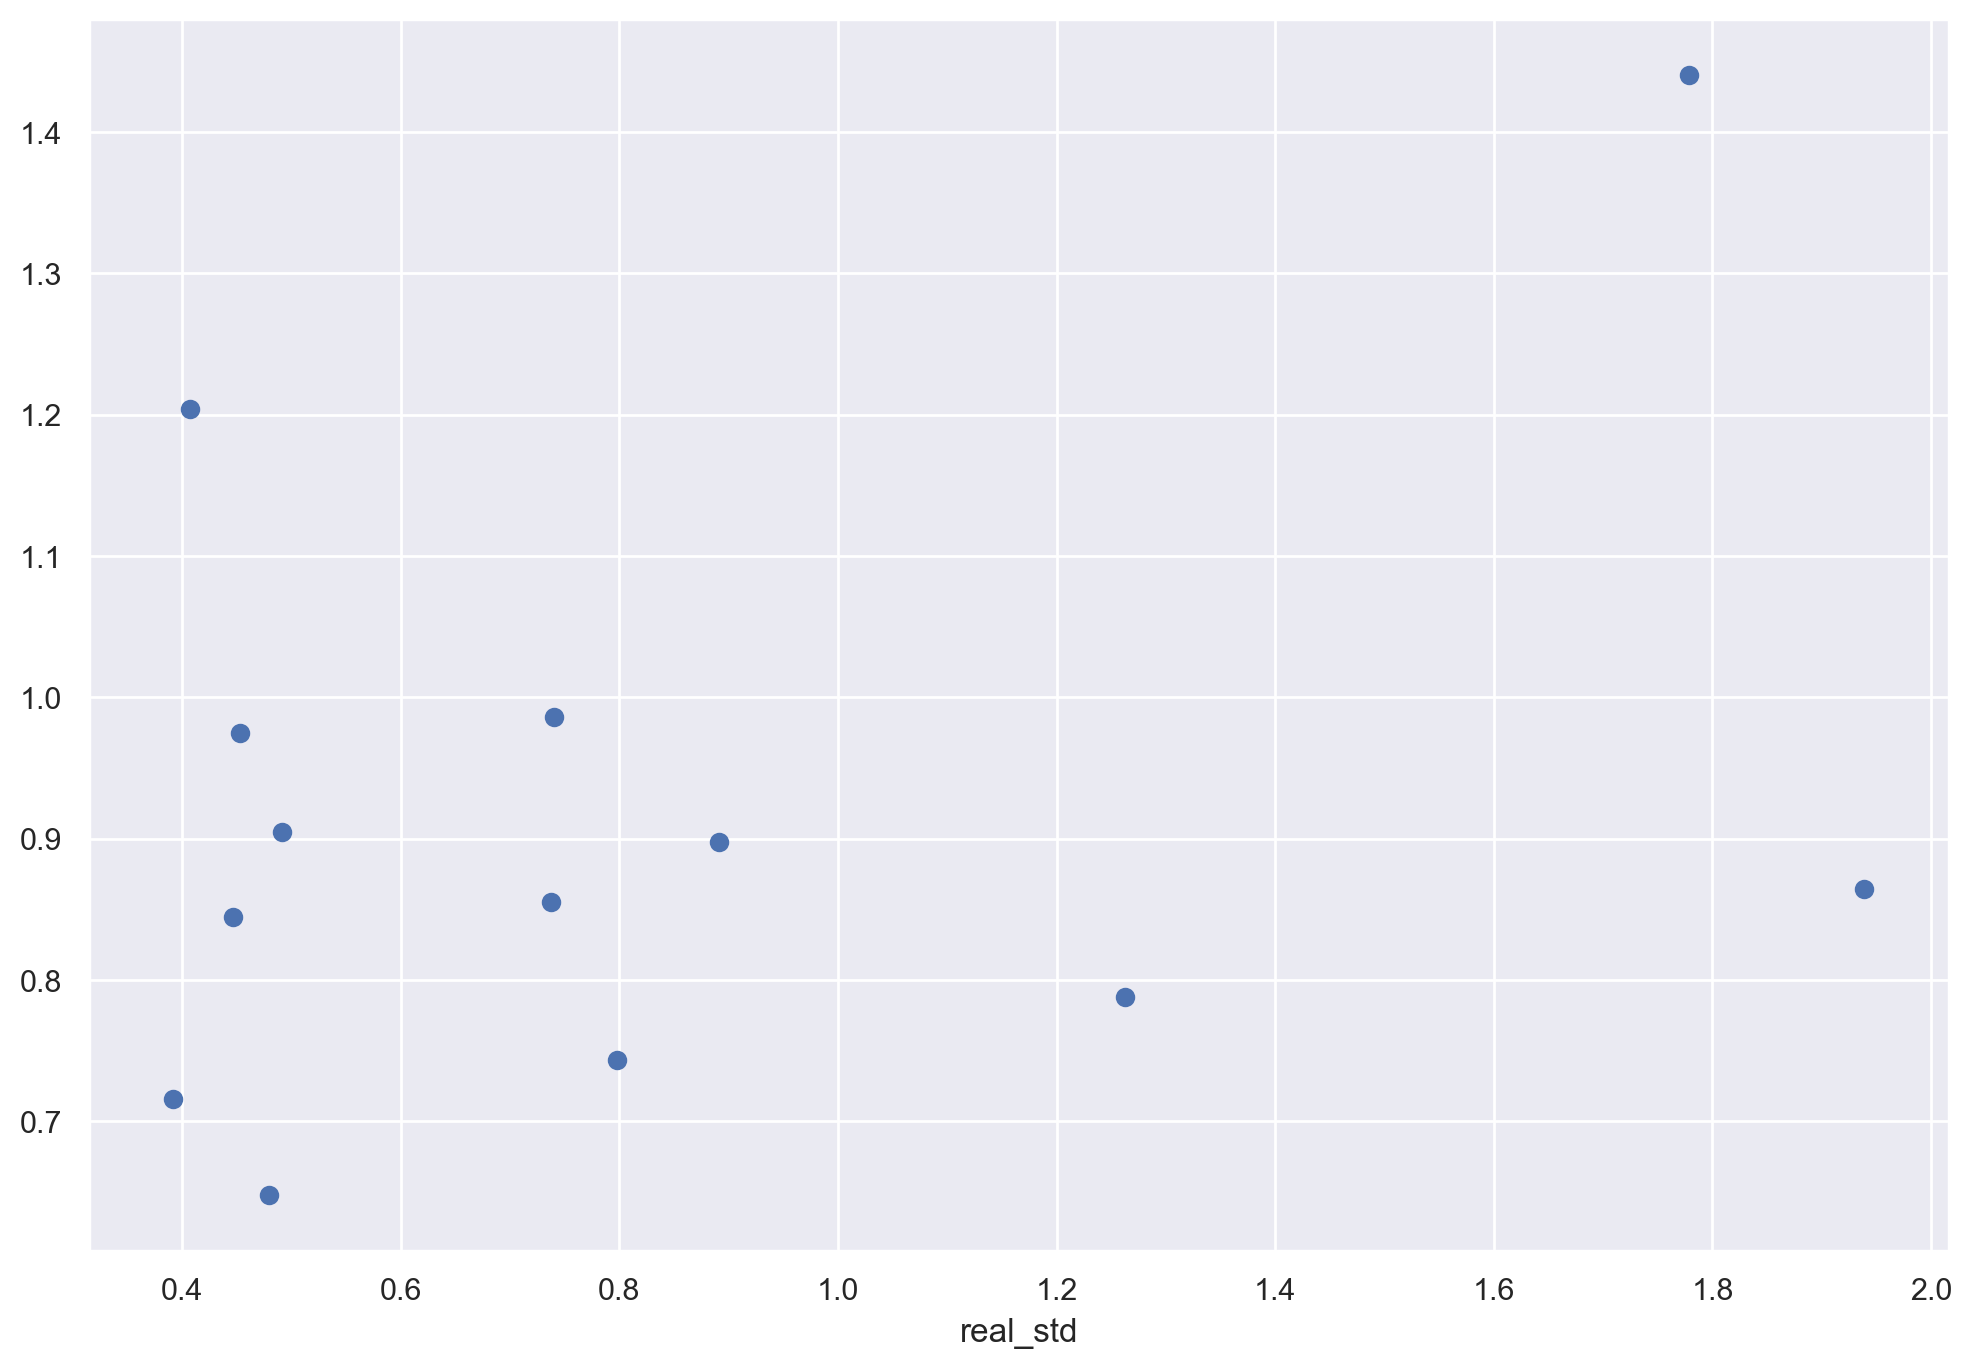

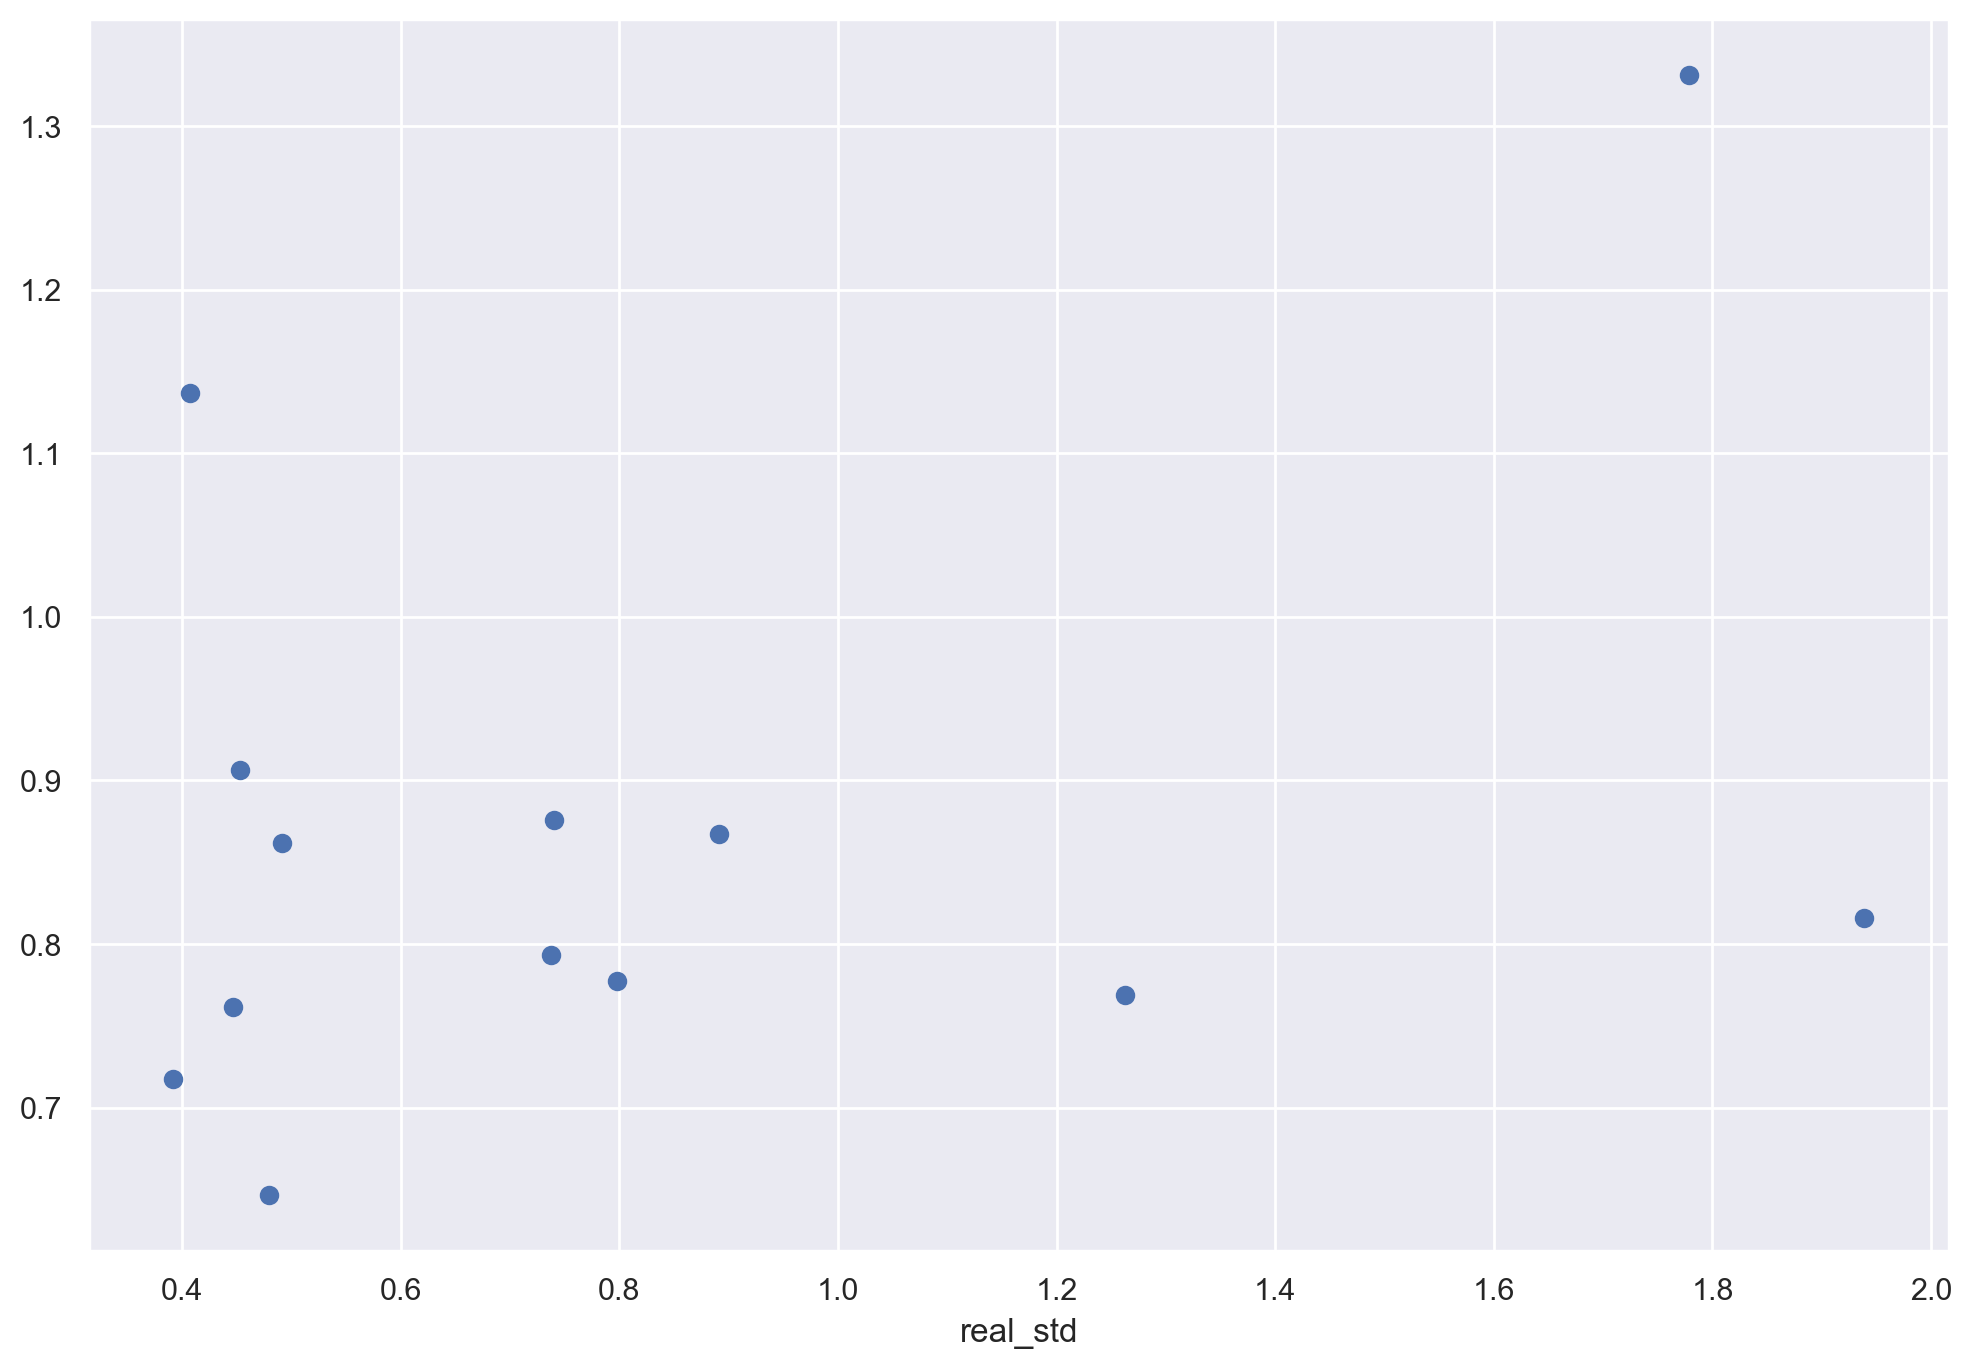

In [182]:
trees = [10,50,100]
for n in trees:
    
    model = RandomForestRegressor(n_estimators=n)
    
    run_model(model,X_train,y_train,X_test,y_test)

## Gradient Boosting


In [183]:
from sklearn.ensemble import GradientBoostingRegressor

In [184]:
# help(GradientBoostingRegressor)

mae : 0.3665157120524937


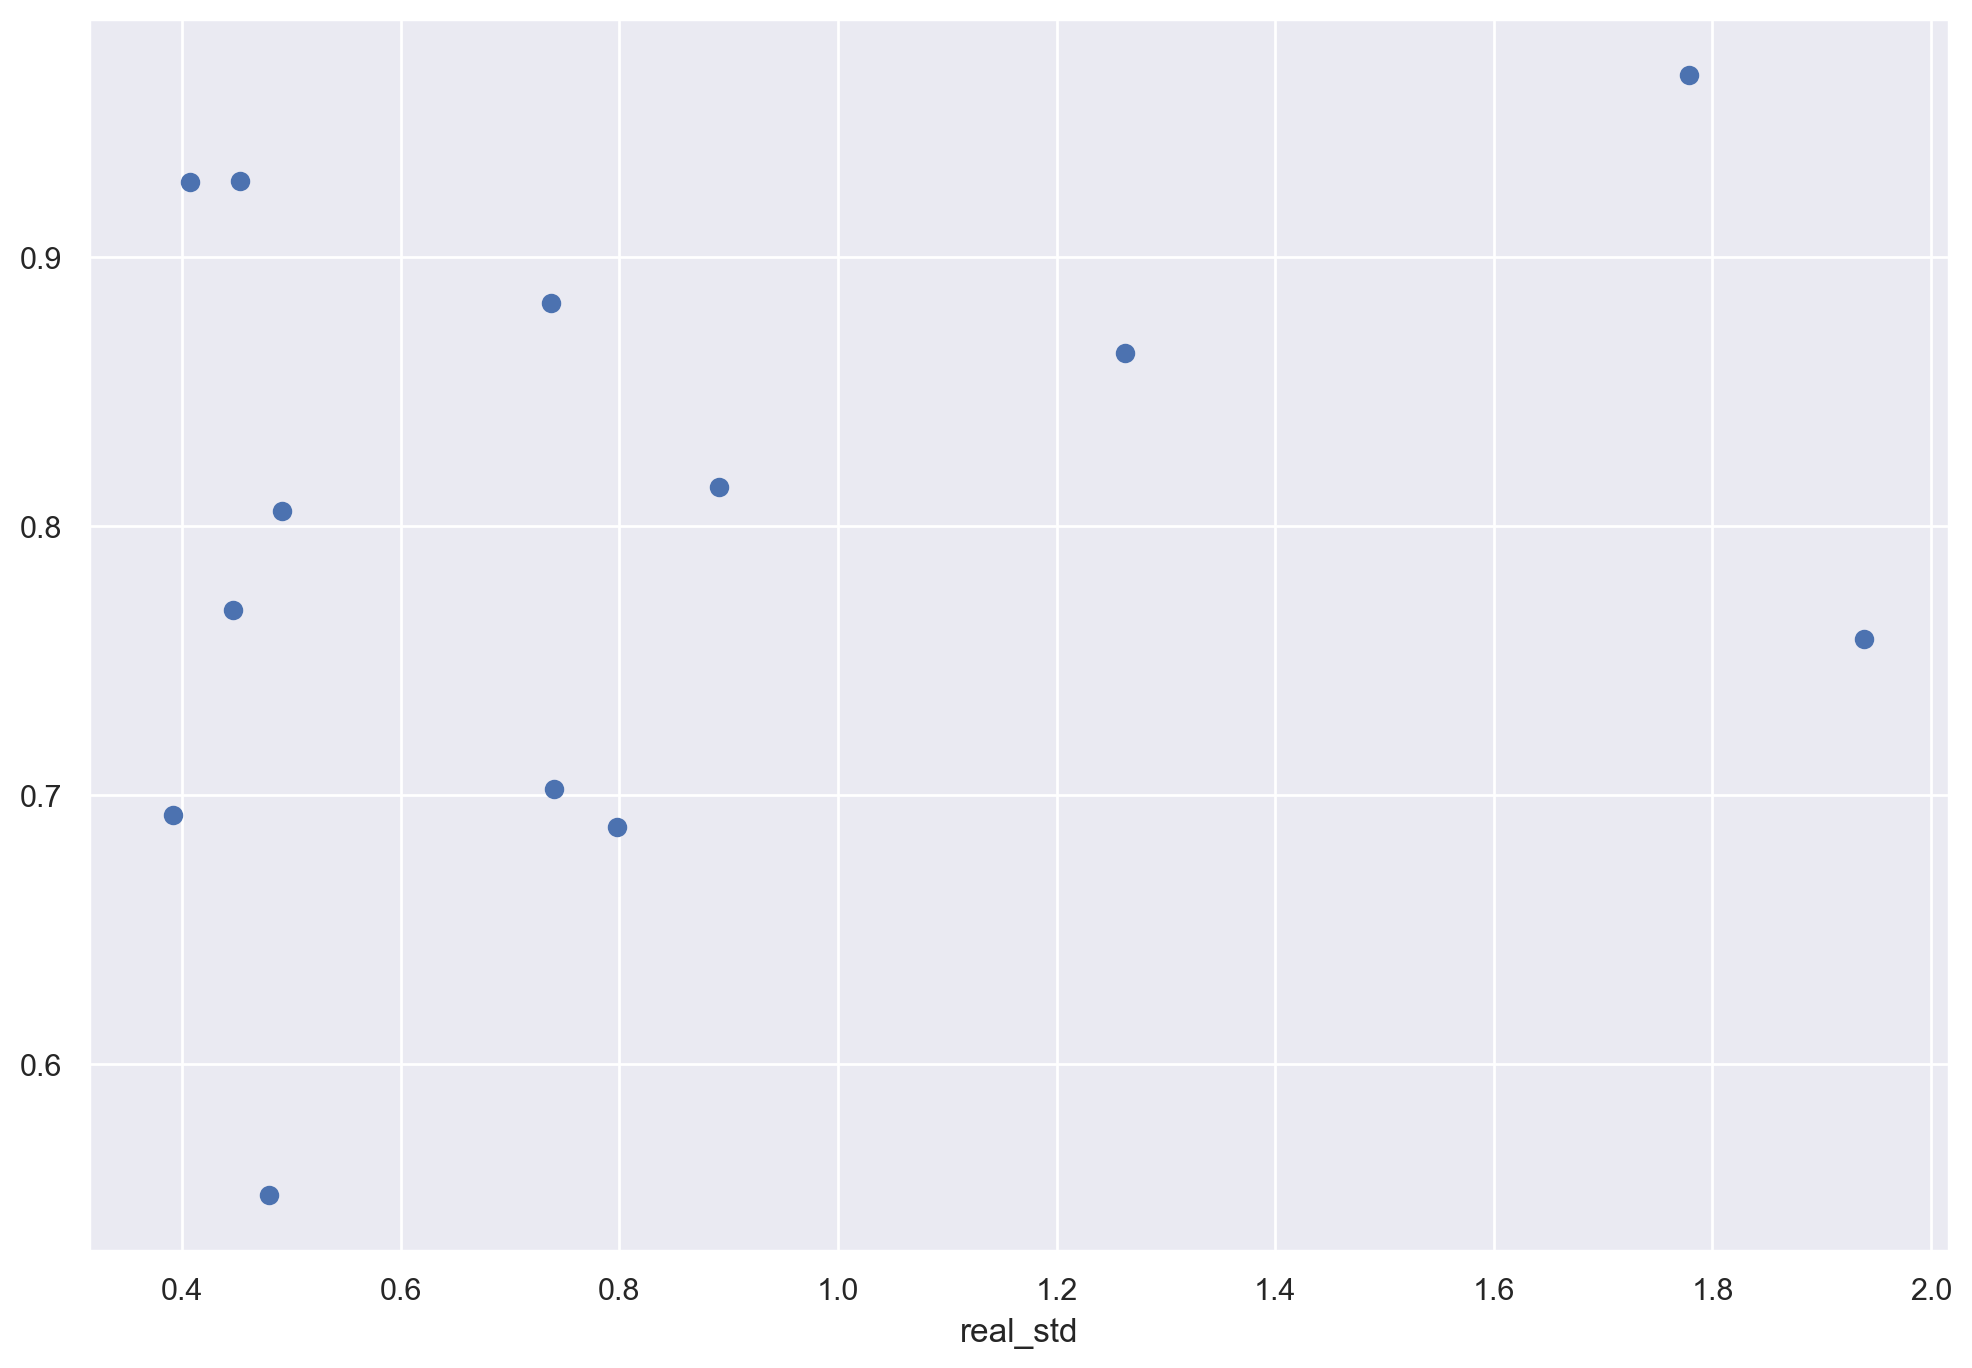

In [185]:
   
model = GradientBoostingRegressor()

run_model(model,X_train,y_train,X_test,y_test)

## Adaboost

In [186]:
from sklearn.ensemble import AdaBoostRegressor

mae : 0.3675297649100236


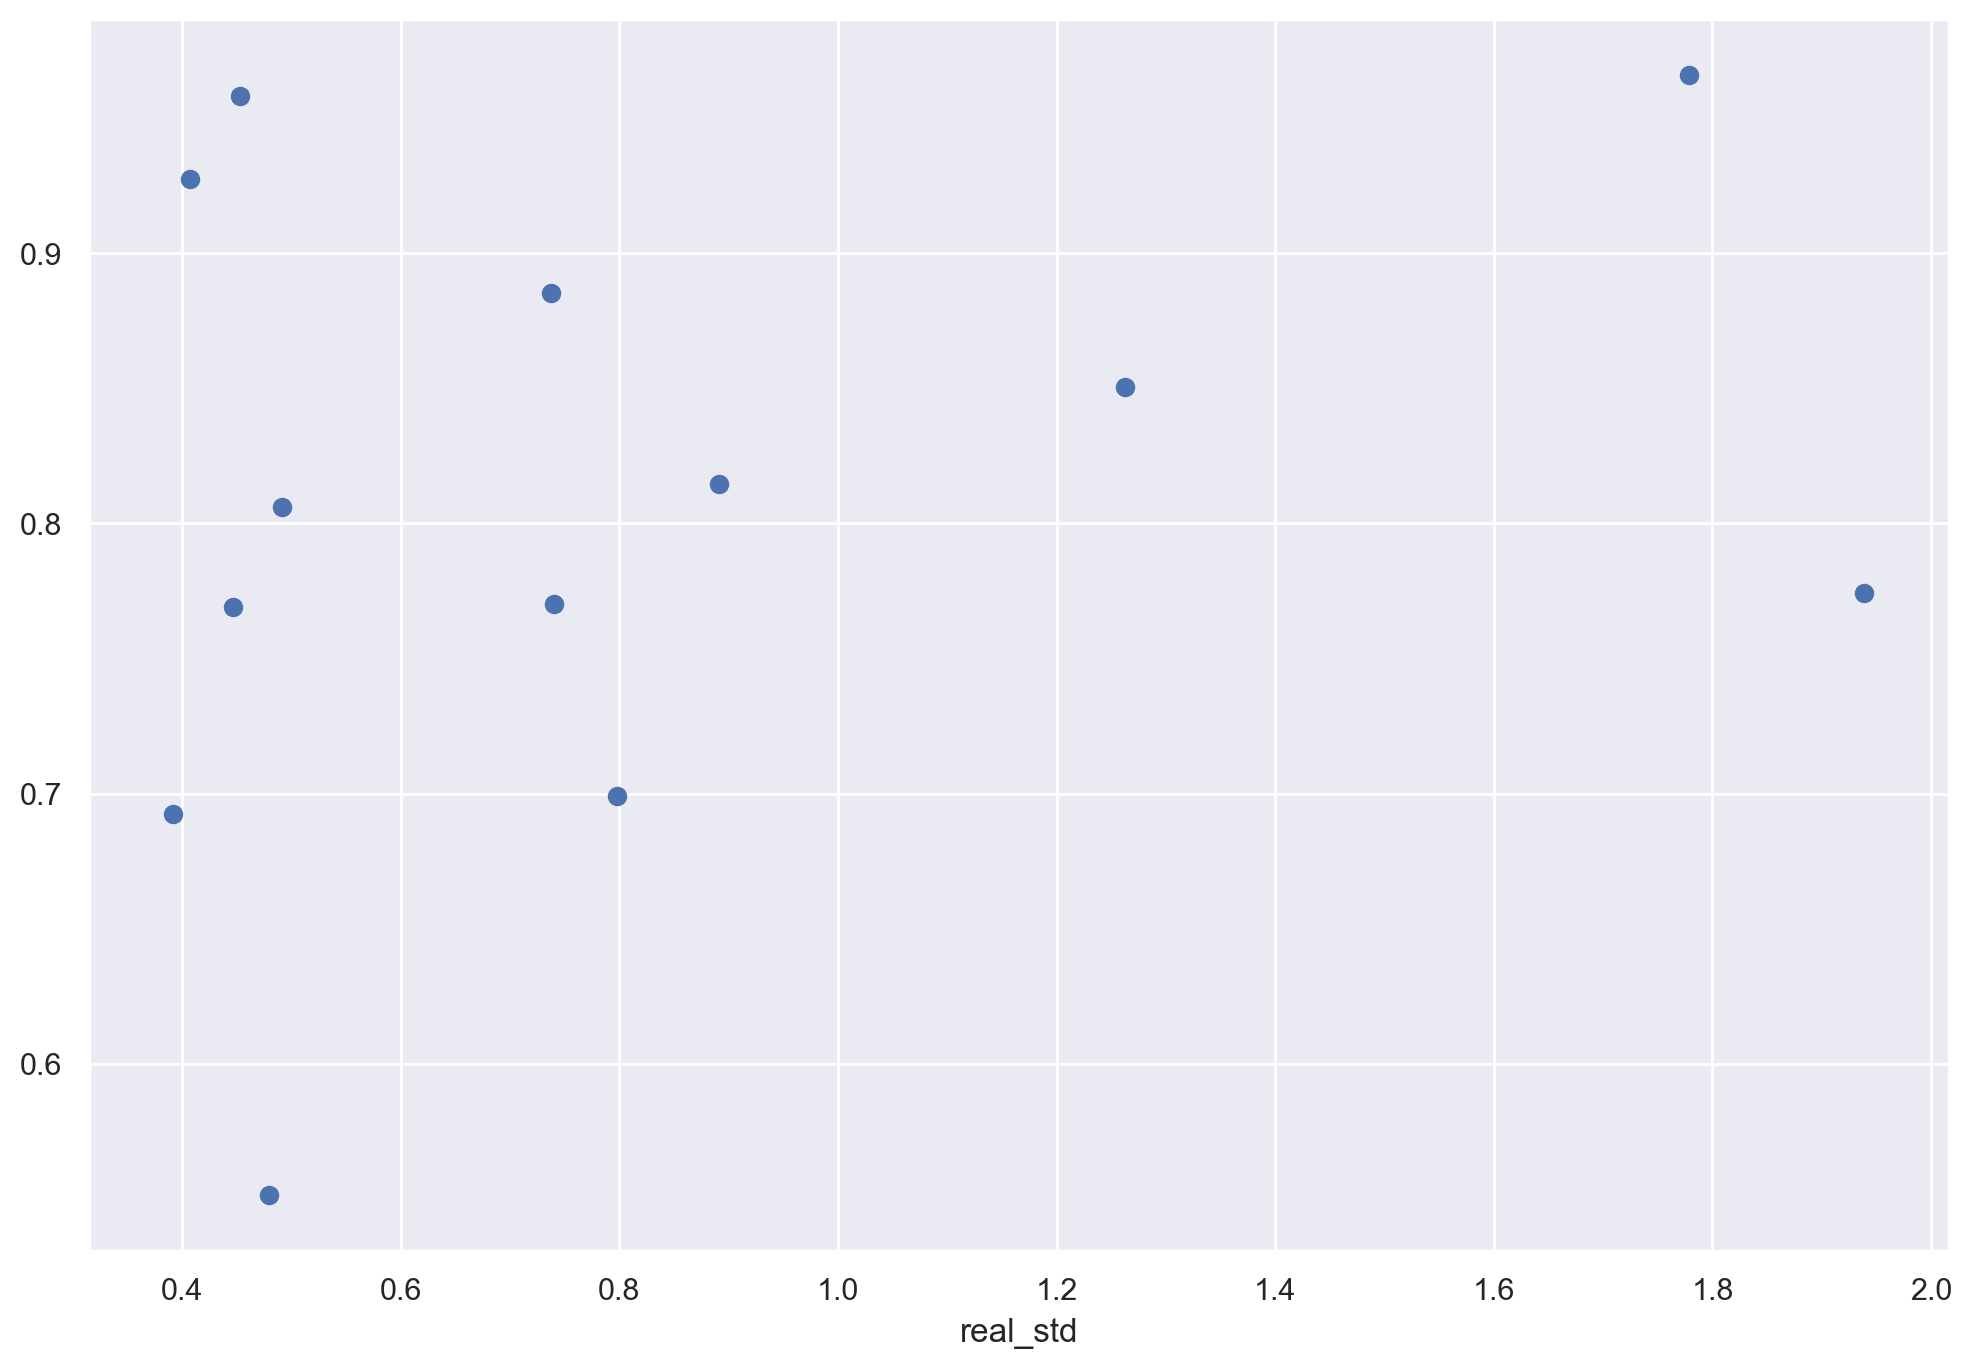

In [187]:
model = GradientBoostingRegressor()

run_model(model,X_train,y_train,X_test,y_test)

In [ ]:
## XGBOOST

In [ ]:
!pip install xgboost

In [189]:
import xgboost as xgb
# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.6, 0.7, 0.8]
}

# Initialize XGBoost regressor
xgbr = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgbr,
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=10,
                           verbose=0,
                          n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", np.sqrt(-grid_search.best_score_))

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Test RMSE:", rmse)

Best parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
Best score: 0.5952216070410503
Test RMSE: 0.4919766034501811


mae : 0.41839776019073704


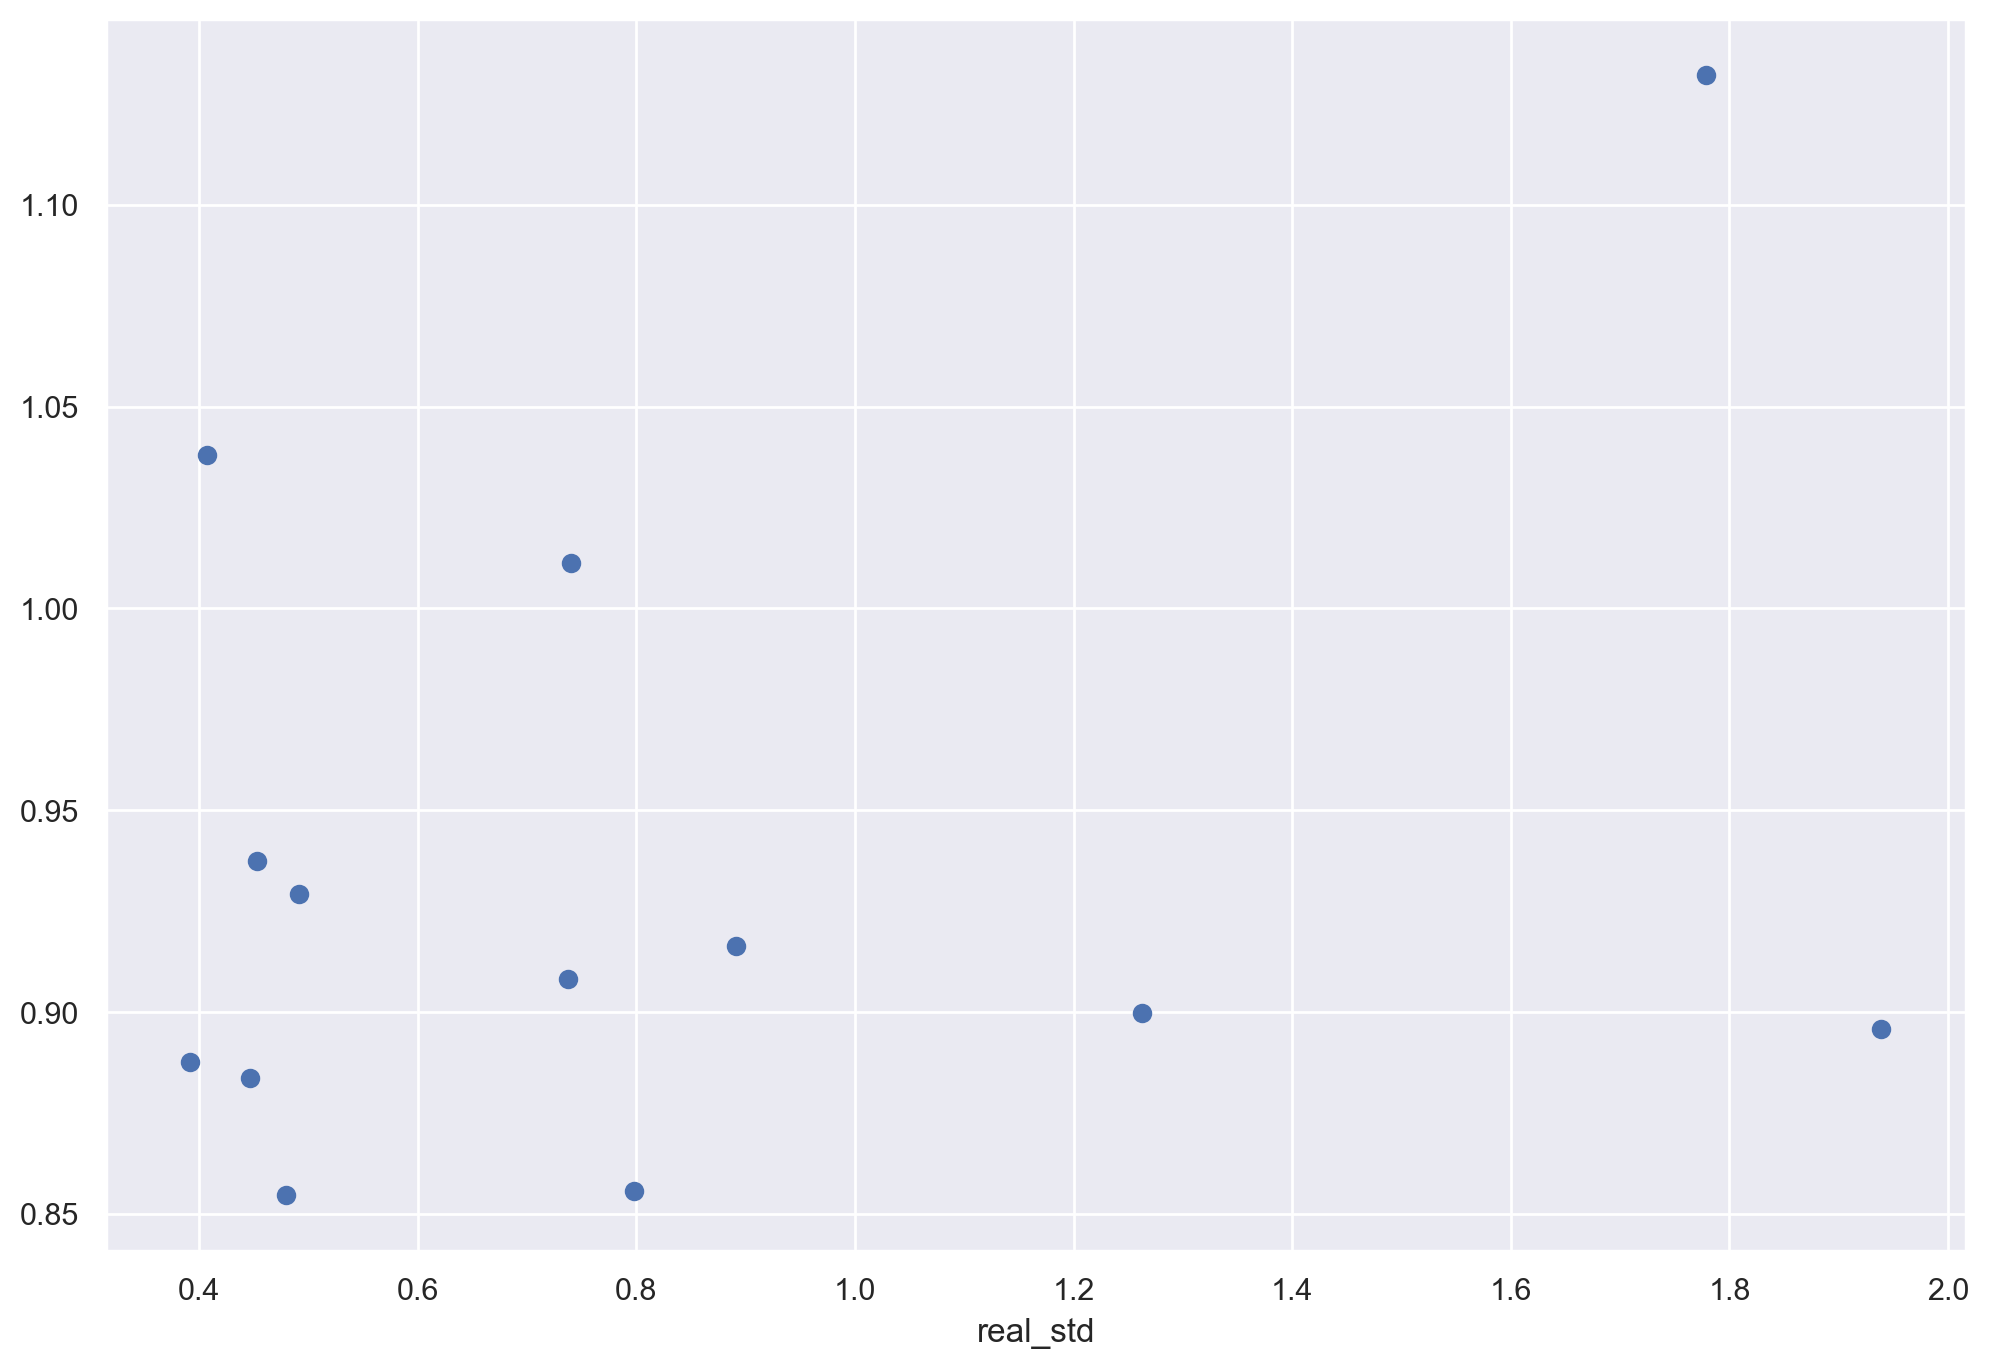

In [190]:
run_model(best_model,X_train,y_train,X_test,y_test)

----